<a href="https://colab.research.google.com/github/SharatGupta/DSML-Projects/blob/main/Jamboree%20Linear%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

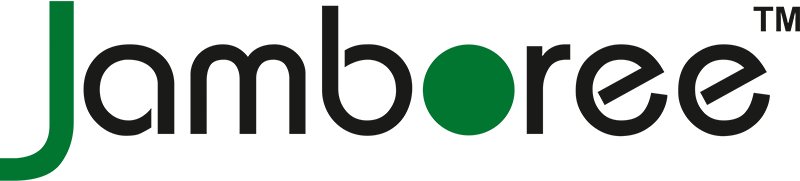
* Jamboree Education offers comprehensive classroom and online preparation programs for GMAT®, GRE®, SAT®, ACT®, TOEFL™, and IELTS™, as well as admissions counselling.
* Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.

# **Business Problem**

* Jamboree recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspectiv
* They want to understand what factors are important in graduate admissions and how these factors are interrelated among themselves.
* It will also help predict one's chances of admission given the rest of the variables

# **Desired Outcome of Analysis**
* Import the dataset and do usual exploratory data analysis steps like checking the structure & characteristics of the dataset.
* Drop the unique row Identifier if you see any. This step is important as you don’t want your model to build some understanding based on row numbers.
* Use Non-graphical and graphical analysis for getting inferences about variables.
* This can be done by checking the distribution of variables of graduate applicants.
* Once you’ve ensured that students with varied merit apply for the university, you can start understanding the relationship between different factors responsible for graduate admissions.
* Check correlation among independent variables and how they interact with each other.
* Use Linear Regression from (Statsmodel library) and explain the results.
* Test the assumptions of linear regression:
** Multicollinearity check by VIF score
** Mean of residuals
** Linearity of variables (no pattern in residual plot)
** Test for Homoscedasticity
** Normality of residuals
* Do model evaluation- MAE, RMSE, R2 score, Adjusted R2.
* Provide actionable Insights & Recommendations
* Try out different Linear Regression

# **Loading Modules and Data**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

#from scipy.stats import  ttest_ind

#from scipy.stats import shapiro,levene
#from statsmodels.graphics.gofplots import qqplot

#from scipy.stats import mannwhitneyu

#!pip install category_encoders
#from category_encoders import TargetEncoder
#!pip install sklearn
# from sklearn.preprocessing import LabelEncoder,OneHotEncoder, StandardScaler, MinMaxScaler

In [2]:
data = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv")

**Description of each column in data**
* Serial No. (Unique row ID)
* GRE Scores (out of 340)
* TOEFL Scores (out of 120)
* University Rating (out of 5)
* Statement of Purpose and Letter of Recommendation Strength (out of 5)
* Undergraduate GPA (out of 10)
* Research Experience (either 0 or 1)
* Chance of Admit (ranging from 0 to 1)

# **Data Overview & Cleaning**

In [ ]:
data.shape

(500, 9)

In [ ]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

* Lets Remove the Additional space from Feature name for easy reference later on

In [15]:
data.rename(columns = {'LOR ' : 'LOR' ,'Chance of Admit ':'Chance of Admit'}, inplace = True)

In [ ]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [ ]:
data.index

RangeIndex(start=0, stop=500, step=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [ ]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


## Dropping Irrelevant columns

Lets Drop the "Serial No" Fields as it just an row indicator does not help us in Predicting "Chance of Admit"


In [25]:
data.drop(["Serial No."], axis = 1,inplace= True)

In [ ]:
data.shape

(500, 8)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


## Duplicate Values & Their Treatment

In [ ]:
data.loc[data.duplicated()]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit


No duplicate rows found

## Missingvalues & Their Treatment

In [ ]:
data.isna().sum(axis = 0)

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

* No Missing values present in the data

## Datatype Conversion of Features

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


* All data Points are Numericals as needed for Linear Regression Model
* No need for conversion of data to Categorical type, all Numerical Data points has some ordinal Meaning

# **Statistical Analysis,Graphical Visualization & Insights**

In [ ]:
data.nunique()

GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 184
Research               2
Chance of Admit       61
dtype: int64

In [ ]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


## Univariate Analysis

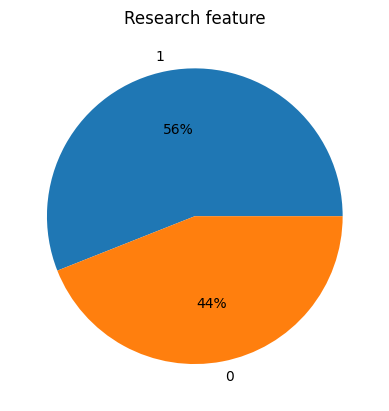

In [ ]:
plt.pie(x = data["Research"].value_counts().reset_index()["Research"],
        labels = data["Research"].value_counts().reset_index()["index"],
        autopct='%.0f%%')
plt.title("Research feature")
plt.show()

* 56% Students have Research Expericence
* 44% Students do have Research Experience

<Axes: xlabel='GRE Score', ylabel='count'>

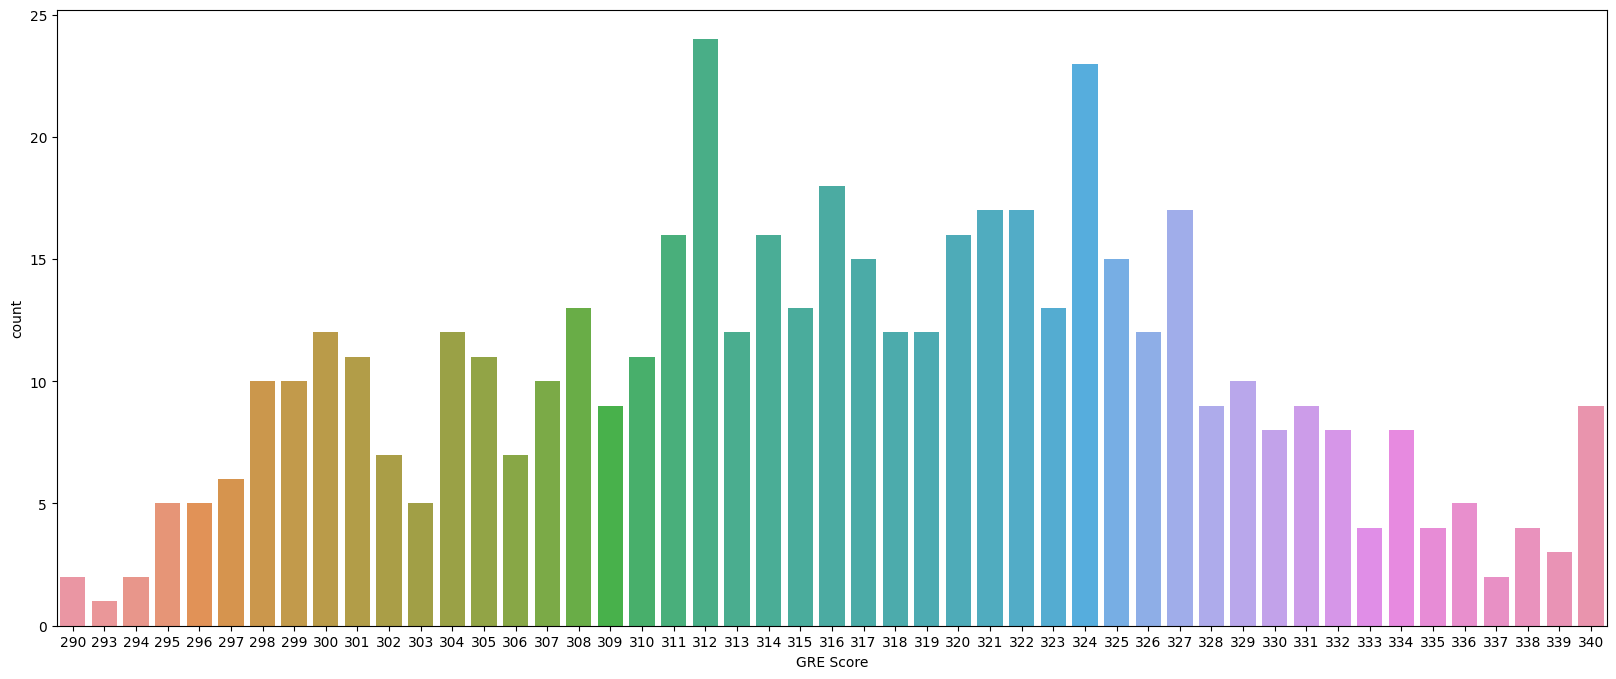

In [10]:
plt.figure(figsize = (20,8))
sns.countplot(data=data, x= "GRE Score")

* GRE Scores are greater than 290, More No of Data points are in that range 310 ~ 327

<Axes: xlabel='TOEFL Score', ylabel='count'>

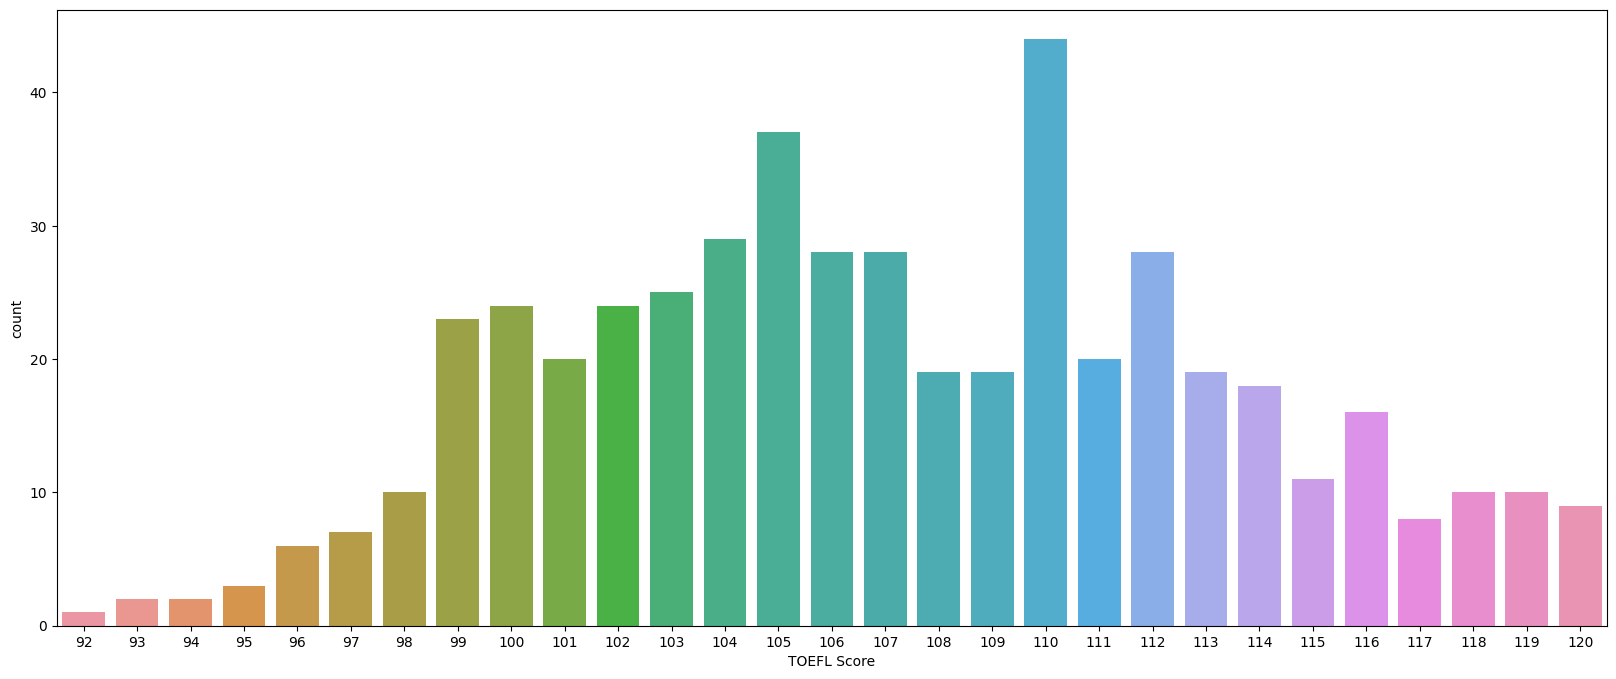

In [ ]:
plt.figure(figsize = (20,8))
plt.xlim([0,340])
sns.countplot(data=data, x= "TOEFL Score")

* TOEFL Scores are greater than 91, More No of Data points are in that range 99~112

<Axes: xlabel='University Rating', ylabel='count'>

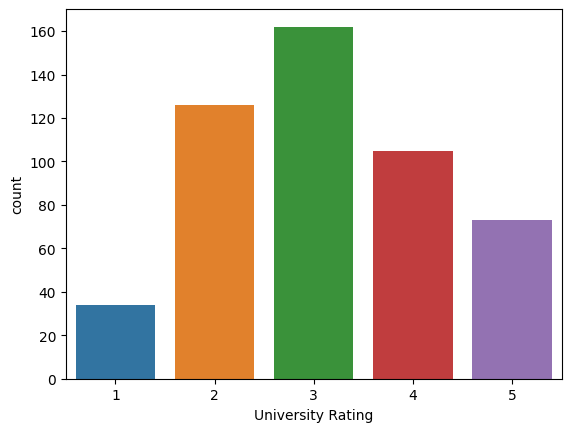

In [ ]:
sns.countplot(data=data, x= 'University Rating')

* More no of Student applied for University Ranking = 3

<Axes: xlabel='LOR', ylabel='count'>

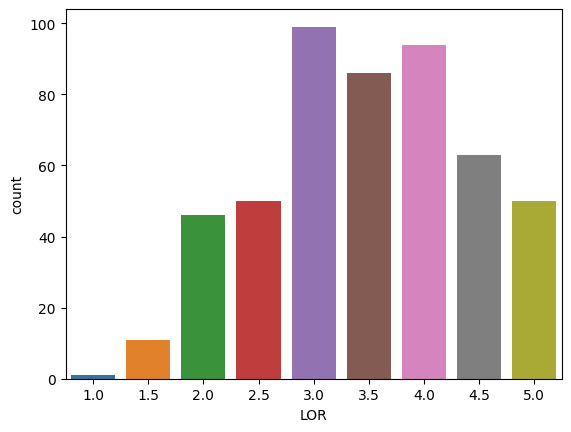

In [ ]:
sns.countplot(data=data, x= 'LOR')

* LOR ranged from 1 ~ 5
* Maximum rating lies between 3 ~ 4.5

<Axes: xlabel='SOP', ylabel='count'>

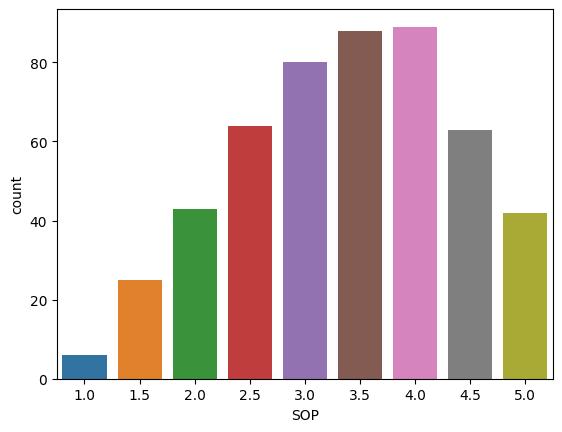

In [ ]:
sns.countplot(data=data, x= 'SOP')

* SOP ranged from 1 ~ 5
* Maximum rating lies between 2.5 ~ 4.5

<Axes: xlabel='CGPA', ylabel='Count'>

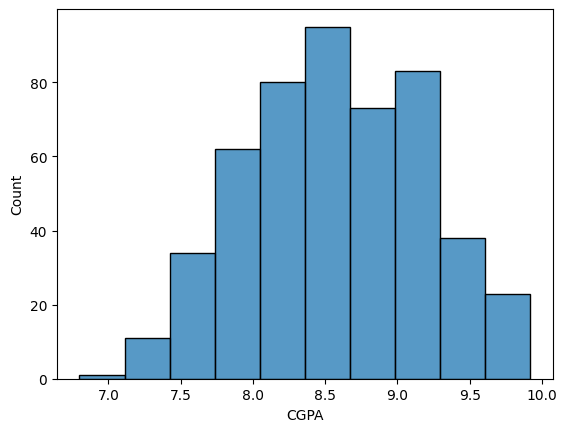

In [11]:
sns.histplot(data=data, x= 'CGPA', bins=10)

* CGPA of the Student are >= 7.0
* Maximum range lies between 7.5 ~ 9.5

<Axes: xlabel='Chance of Admit', ylabel='Count'>

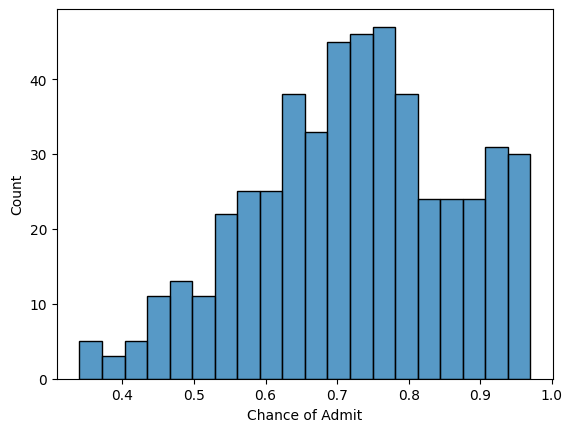

In [70]:
sns.histplot(data=data, x= 'Chance of Admit', bins=20)

## Bivariate Analysis

<Axes: xlabel='University Rating', ylabel='Chance of Admit'>

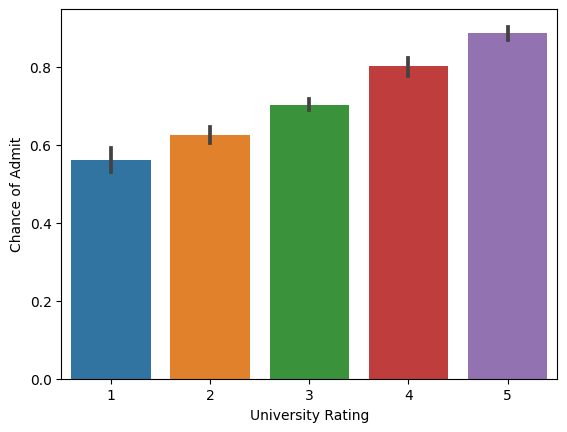

In [16]:
sns.barplot(data=data, x='University Rating',y='Chance of Admit',estimator = "mean")

<Axes: xlabel='SOP', ylabel='Chance of Admit'>

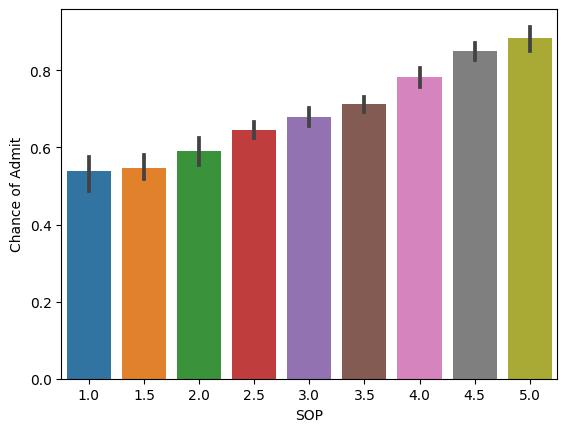

In [17]:
sns.barplot(data=data, x='SOP',y='Chance of Admit',estimator = "mean")

<Axes: xlabel='LOR', ylabel='Chance of Admit'>

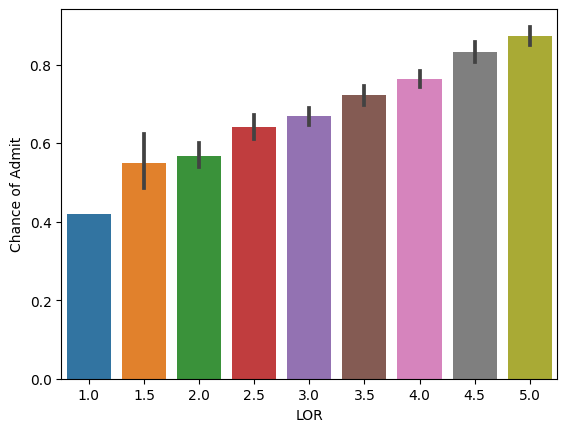

In [18]:
sns.barplot(data=data, x='LOR',y='Chance of Admit',estimator = "mean")

<Axes: xlabel='CGPA', ylabel='Chance of Admit'>

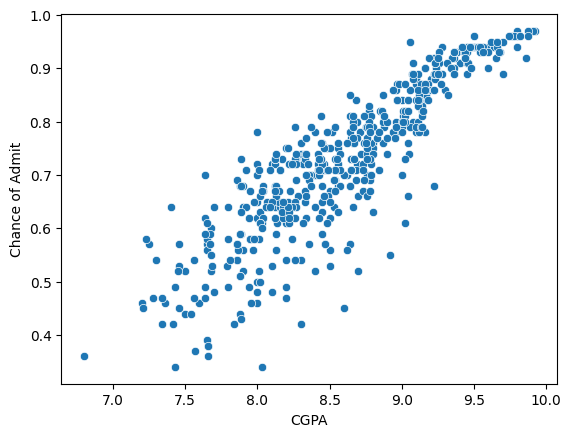

In [20]:
sns.scatterplot(data=data, x='CGPA',y='Chance of Admit')

<Axes: xlabel='GRE Score', ylabel='Chance of Admit'>

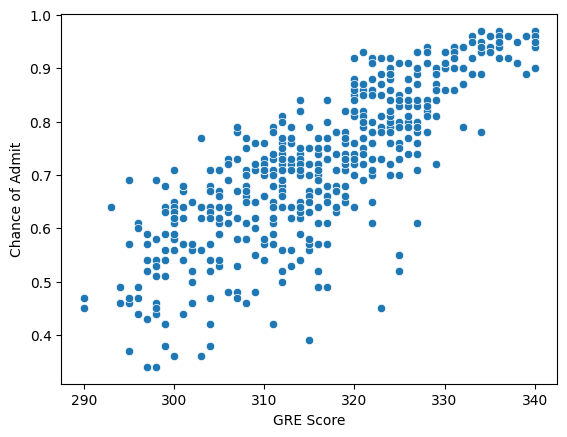

In [28]:
sns.scatterplot(data=data, x='GRE Score',y='Chance of Admit')

<Axes: xlabel='TOEFL Score', ylabel='Chance of Admit'>

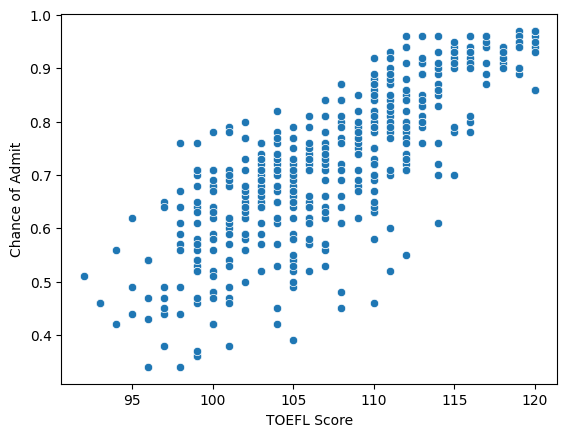

In [30]:
sns.scatterplot(data=data, x='TOEFL Score',y='Chance of Admit')

<Axes: xlabel='Research', ylabel='Chance of Admit'>

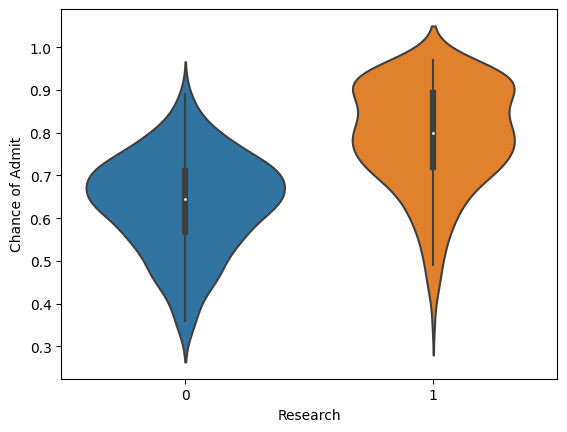

In [32]:
sns.violinplot(data = data, y = "Chance of Admit", x = "Research")

In [26]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

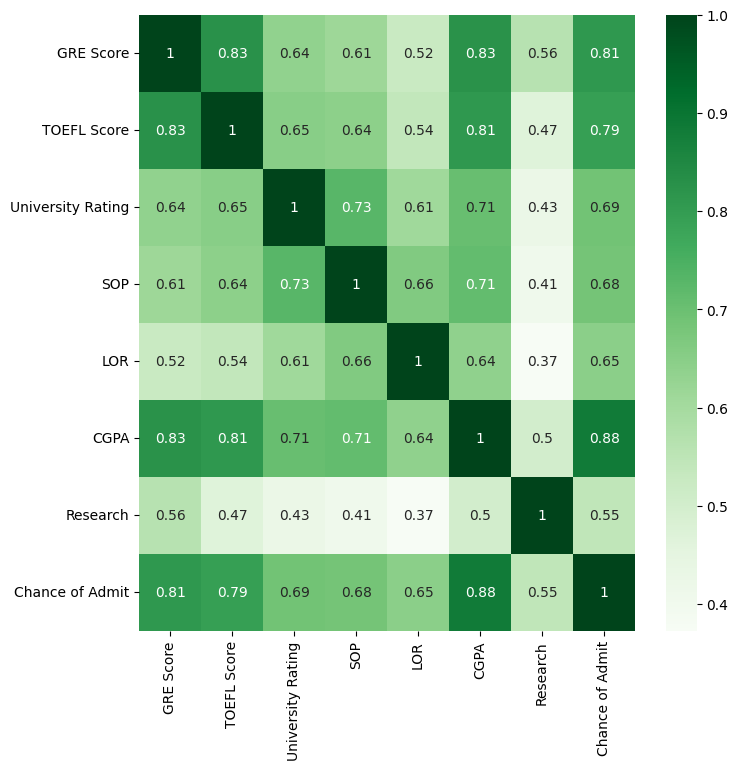

In [36]:
plt.figure(figsize =(8,8))
sns.heatmap(data.corr(),annot=True,cmap = "Greens")
plt.show()

* All features have Positive correlation with "Chance of Admit"
* CGPA[0.88],GRE Score[0.81],TOEFL Score[0.79] has very high correlation with "Chance of Admit"
* Further SOP[0.68], LOR[0.65] has almost same Correlation with ""Chance of Admit" however less than above 3"
* Least Correlation is found w.r.t Reasearch & "Chance of Admit"[0.55]

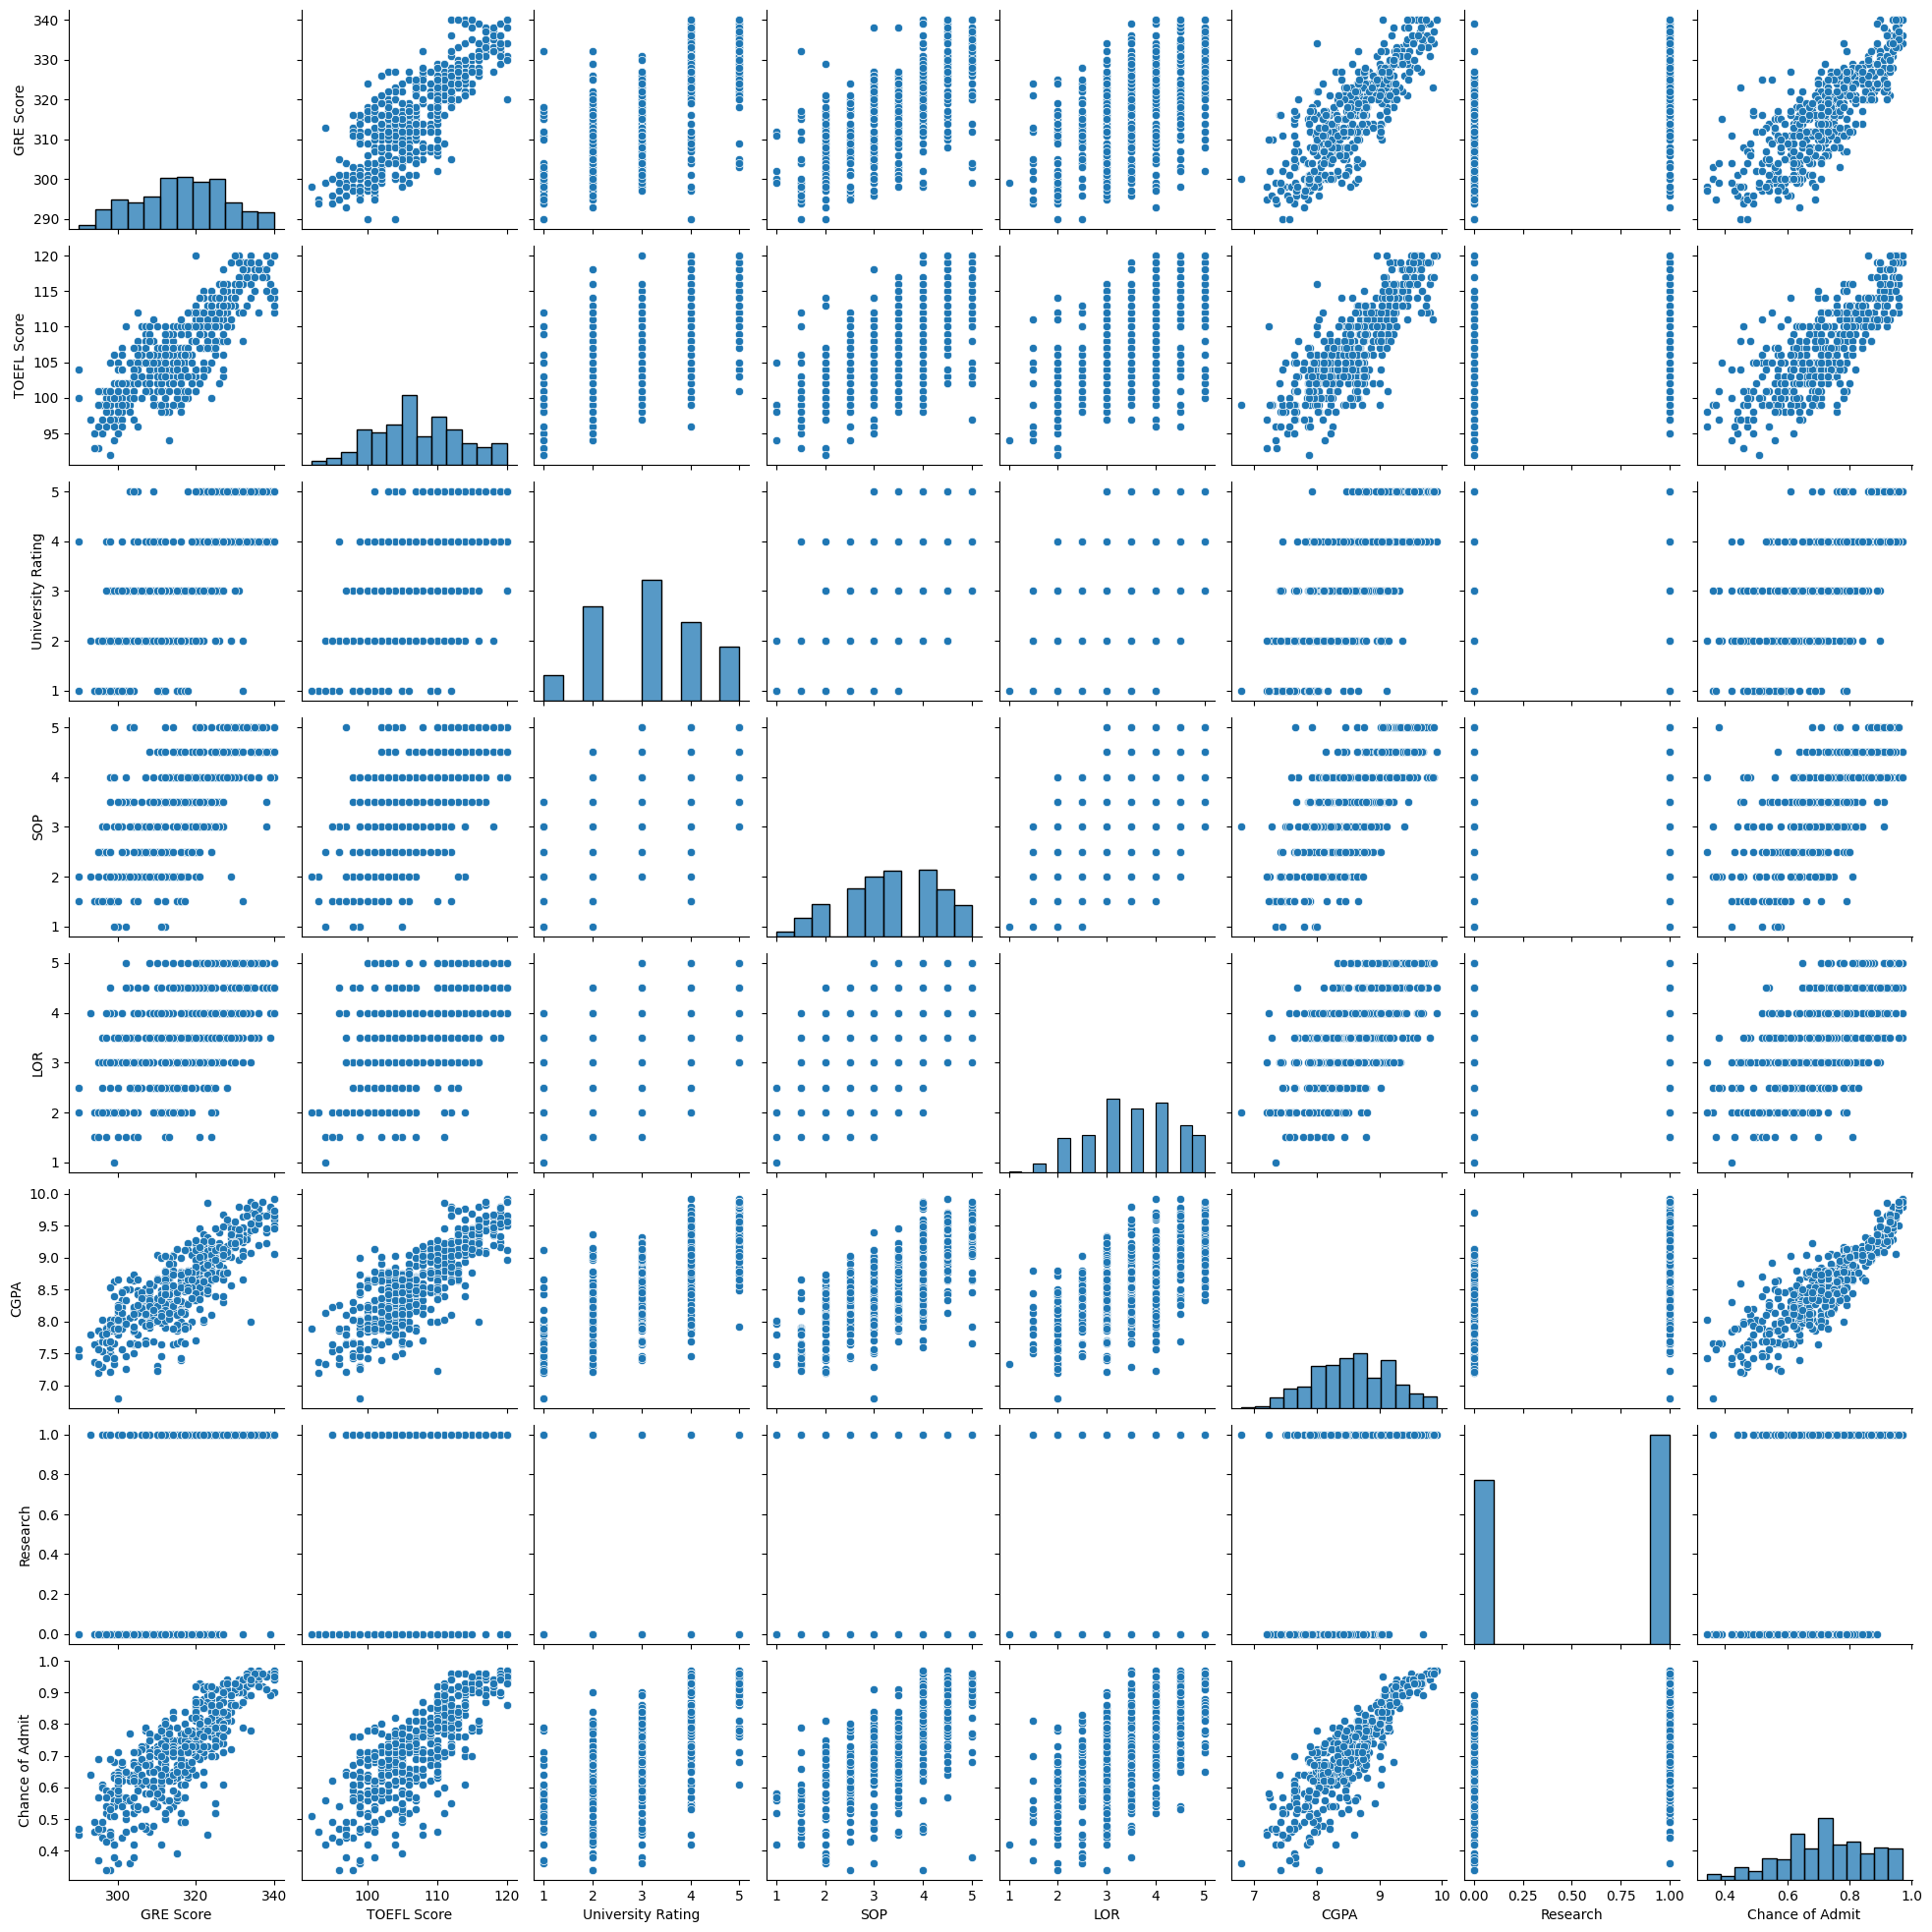

In [39]:
sns.pairplot(data=data)

* All Time & Distance Feature are very highly correlated

# **Finding & Treating Outliers Using IQR**

In [ ]:
numericalfeatures = ["start_scan_to_end_scan","od_total_time","actual_distance_to_destination","actual_time","segment_actual_time", "osrm_time",
 "osrm_distance","segment_osrm_time","segment_osrm_distance"]

## IQR Analysis and Outlier Finding

In [48]:
data["CGPA"].quantile(0.25)

8.127500000000001

* We will create a new Dataframe " outlier" which store Boolean value of IQR Analysis Result for each reading of all numerical feature columns

In [46]:
# Finding outlier for all Numerical features
outlier = pd.DataFrame() # creating as new dataframe to store outliers for each numerical feature
for z in data.columns:
    print(z,"Feature")
    print("*******************************************************************")
    IQR = np.percentile(data[z],75) - np.percentile(data[z],25)
    lower_limit = max (np.percentile(data[z],25) - 1.5*IQR,0)
    upper_limit = np.percentile(data[z],75) + 1.5*IQR
    outlier[z] = (data[z]>upper_limit) | (data[z]<lower_limit)

    print("Minimum -->",data[z].min())
    print("Lower Limit -->",lower_limit)
    print("Quantile25 -->",np.percentile(data[z],25))
    print("Median -->",np.percentile(data[z],50))
    print("Quantile75 -->",np.percentile(data[z],75))
    print("Upper Limit -->",upper_limit)
    print("Maximum -->",data[z].max())

    print()
    print("Out of ",len(data[z]), "Data points , There are",outlier[z].sum(),"Outliers")
    print("Percentage of Outliers:",np.round((outlier[z].sum()/len(data[z])*100),2),"%")
    print()
    print("*******************************************************************")

GRE Score Feature
*******************************************************************
Minimum --> 290
Lower Limit --> 282.5
Quantile25 --> 308.0
Median --> 317.0
Quantile75 --> 325.0
Upper Limit --> 350.5
Maximum --> 340

Out of  500 Data points , There are 0 Outliers
Percentage of Outliers: 0.0 %

*******************************************************************
TOEFL Score Feature
*******************************************************************
Minimum --> 92
Lower Limit --> 89.5
Quantile25 --> 103.0
Median --> 107.0
Quantile75 --> 112.0
Upper Limit --> 125.5
Maximum --> 120

Out of  500 Data points , There are 0 Outliers
Percentage of Outliers: 0.0 %

*******************************************************************
University Rating Feature
*******************************************************************
Minimum --> 1
Lower Limit --> 0
Quantile25 --> 2.0
Median --> 3.0
Quantile75 --> 4.0
Upper Limit --> 7.0
Maximum --> 5

Out of  500 Data points , There are 0 Outliers
Per

In [61]:
# Finding outlier for all Numerical features
# In this we are not creating a exlusive DataFrame to Store , just find & print the index of Outliers
for z in data.columns:
    outlierlist=[]
    print(z,"Feature")
    print("*******************************************************************")
    IQR = np.percentile(data[z],75) - np.percentile(data[z],25)
    lower_limit = max (np.percentile(data[z],25) - 1.5*IQR,0)
    upper_limit = np.percentile(data[z],75) + 1.5*IQR
    outlierlist.extend(list(np.where( (data[z]>upper_limit) | (data[z]<lower_limit) )[0]))

    print("Minimum -->",data[z].min())
    print("Lower Limit -->",lower_limit)
    print("Quantile25 -->",np.percentile(data[z],25))
    print("Median -->",np.percentile(data[z],50))
    print("Quantile75 -->",np.percentile(data[z],75))
    print("Upper Limit -->",upper_limit)
    print("Maximum -->",data[z].max())

    print("Outlier row Index:",outlierlist)

    print()
    print("Out of ",len(data[z]), "Data points , There are",len(outlierlist),"Outliers")
    print("Percentage of Outliers:",np.round((len(outlierlist)/len(data[z])*100),2),"%")
    print()
    print("*******************************************************************")

GRE Score Feature
*******************************************************************
Minimum --> 290
Lower Limit --> 282.5
Quantile25 --> 308.0
Median --> 317.0
Quantile75 --> 325.0
Upper Limit --> 350.5
Maximum --> 340
Outlier row Index: []

Out of  500 Data points , There are 0 Outliers
Percentage of Outliers: 0.0 %

*******************************************************************
TOEFL Score Feature
*******************************************************************
Minimum --> 92
Lower Limit --> 89.5
Quantile25 --> 103.0
Median --> 107.0
Quantile75 --> 112.0
Upper Limit --> 125.5
Maximum --> 120
Outlier row Index: []

Out of  500 Data points , There are 0 Outliers
Percentage of Outliers: 0.0 %

*******************************************************************
University Rating Feature
*******************************************************************
Minimum --> 1
Lower Limit --> 0
Quantile25 --> 2.0
Median --> 3.0
Quantile75 --> 4.0
Upper Limit --> 7.0
Maximum --> 5
Outlier

## Box-Plot for Outlier Visualization

* Let us visualize the outliers with Box plot

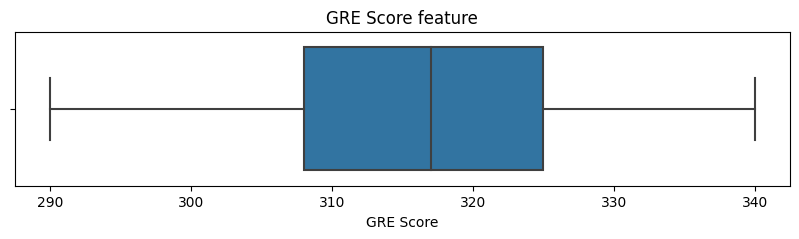

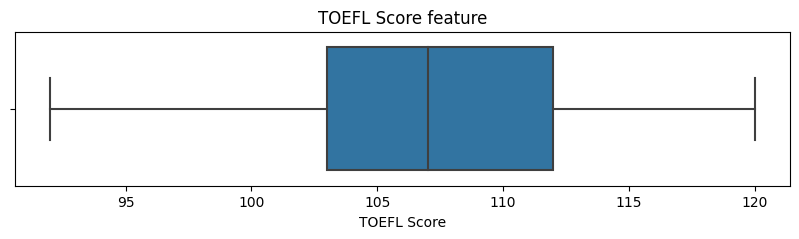

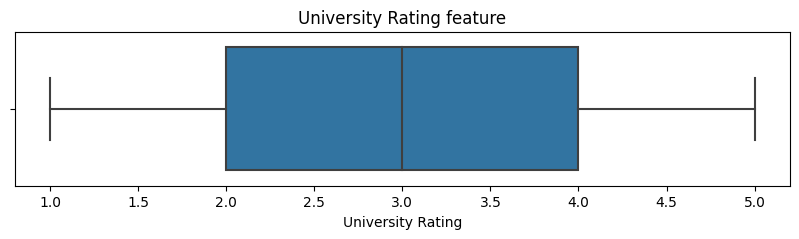

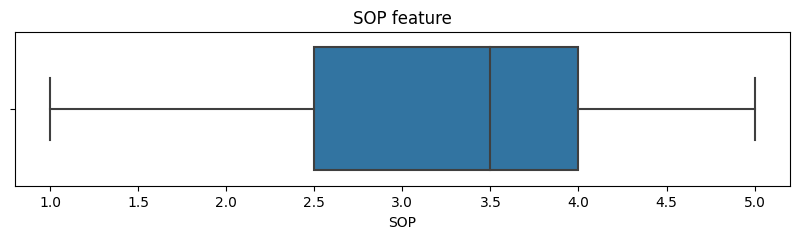

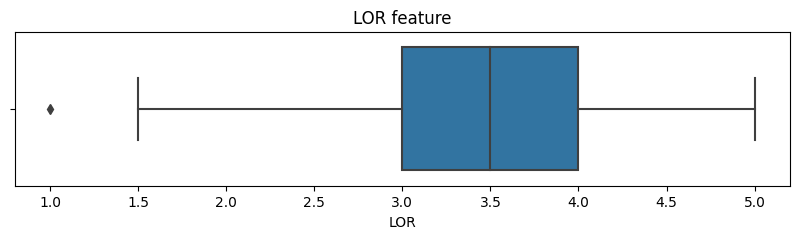

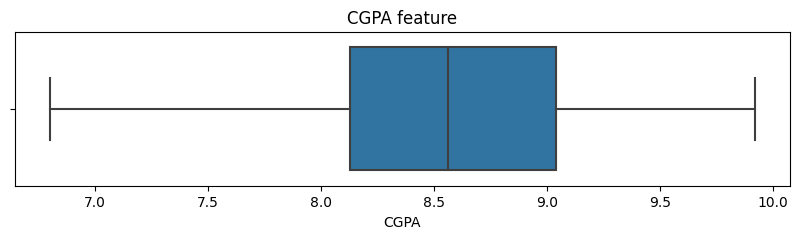

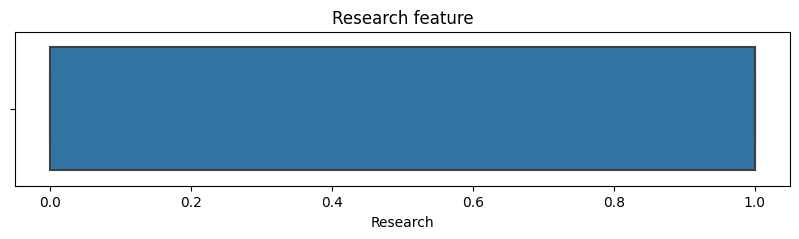

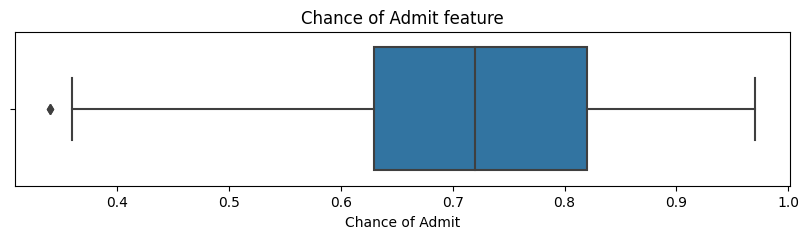

In [43]:
for z in data.columns:
  plt.figure(figsize=(10,2))
  sns.boxplot(data= data, x = z)
  plt.title(z+" feature")

## Outlier Treatment

* Lets check which Data Points are coming as Outlier, then we can decide if they have to be treated

In [63]:
outlier.shape

(500, 8)

In [ ]:
data[outlier.any(axis=1)]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
92,298,98,2,4.0,3.0,8.03,0,0.34
347,299,94,1,1.0,1.0,7.34,0,0.42
376,297,96,2,2.5,2.0,7.43,0,0.34


* **We have 2 Outliers in "Chance of Admit" --> But as it is out Target Feature, We should not Treat it**
* But there is 1 Outlier in "LOR", we will check if it has to be treated

In [67]:
data[["Chance of Admit","LOR"]].describe()

,Chance of Admit,LOR
count,500.00000,500.00000
mean,0.72174,3.48400
std,0.14114,0.92545
min,0.34000,1.00000
25%,0.63000,3.00000
50%,0.72000,3.50000
75%,0.82000,4.00000
max,0.97000,5.00000


In [69]:
data[data["LOR"] == 1]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
347,299,94,1,1.0,1.0,7.34,0,0.42


* LOR ranking is out of 5, our Outlier value is 1
* LOR values as "1" is possible values, it cannot be considered as outlier
* But as we creating only Linear Regression model Futher , we will treat this outlier and Floor the value

In [78]:
data.loc[347,"LOR"] = 1.5

<Axes: xlabel='LOR'>

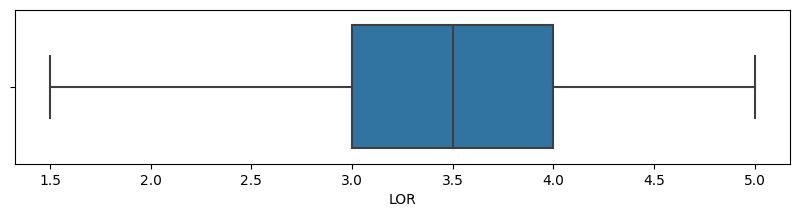

In [80]:
plt.figure(figsize=(10,2))
sns.boxplot(data=data, x= "LOR")

* 1 Outlier in LOR has been Treated, NO Oultier is visible in Box Plot

# **Hypothesis Testing**

* In this Data Differet test [Num-Num,Cat-Num,Cat-Cat] can be done
* But our objective to increase the end user experince by correctly predicting Duration of Delivery & for optimizing Logistics by correctly predicting distance w.r.t OSRM Distance & Duration
* Also we have to optimize Each Segment wise for each trip
* so we will do Hypothesis testing for below combinations
** od_total_time and start_scan_to_end_scan
** actual_time and osrm_time
** actual_time and segment_actual_time
** osrm_distance and segment_osrm_distance
** osrm_time and segment_osrm_time
** actual_distance_to_destination and osrm_distance





## Hypothesis Testing Set up

In this section let us fix the Confidence level & Level of Signification for all our Hypothesis testing.

As this is with respect to predicting demand Situation
* let us Assume **we want 95% Confidence to reject Null Hypothesi**s
* so for every Hypothesis testing, **Level of Significane will be "0.05 "**

As we have 2 Nos of Cat-Num, we will use 2 Sample T-Test or its equivalent
* Ho --> Both Categories have same Mean
* Ha --> Both Categories have different mean

Before using T-test , we will c**heck for assumptions if both Data sample means are following Normal Distribution? & does they have equal variance**?

* For **Sample means should follow Normal Distribution**, we will use Shapiro test with below Hypothesis Condition
** H0 : Data is Gaussian
** Ha : Data is not Gaussian

* For **Equal Variances** Check, we will use Levene Test with below Hypothesis condition
** H0: Variances are equal
** Ha: Variances are not equal




## od_total_time and start_scan_to_end_scan

In [ ]:
subset = ["od_total_time","start_scan_to_end_scan"]

In [ ]:
subsetsamplemean = [[np.mean(data2[i].sample(500)) for k in range(5000)] for i in subset]

* let's check for Normal Distribution of both Data sets Sample Mean

In [ ]:
# H0 : Data is Gaussian
# Ha : Data is not Gaussian
for i in range(2):
  test_stat, p_value = shapiro(subsetsamplemean[i])
  print(p_value)
  if p_value < 0.05:
       print("Reject H0")
       print(subset[i],"Data is Not Gaussian")
  else:
       print("Fail to reject H0")
       print(subset[i],"Data is Gaussian")
  print()

1.3234453945187852e-05
Reject H0
od_total_time Data is Not Gaussian

0.006467732600867748
Reject H0
start_scan_to_end_scan Data is Not Gaussian



* Let us plot Histplot to check how data actually looks

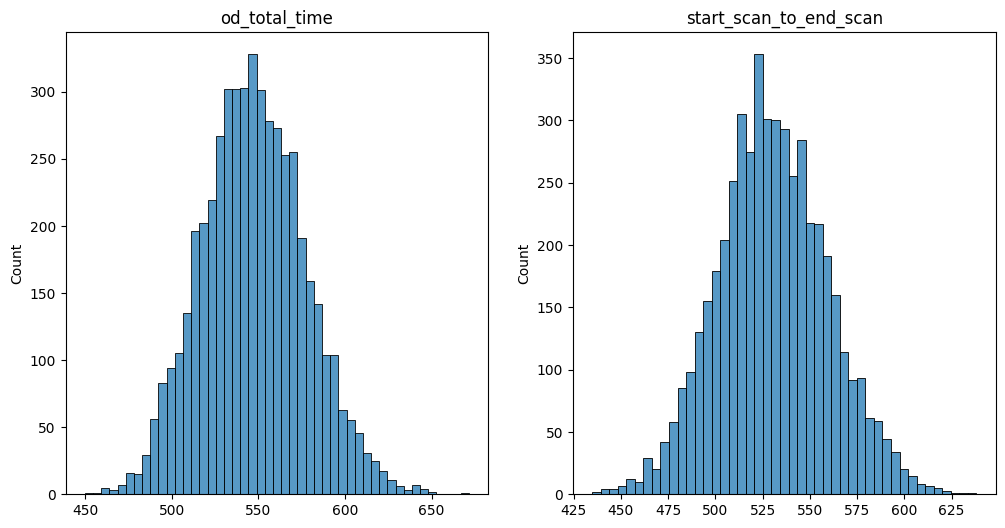

In [ ]:
plt.figure(figsize = (12,6))
for i in range(2):
  plt.subplot(1,2,i+1)
  sns.histplot(subsetsamplemean[i])
  plt.title(subset[i])
plt.show()

* Even the Histogram shows that they are not following Normal Distribution
* Let's do QQ Plot also

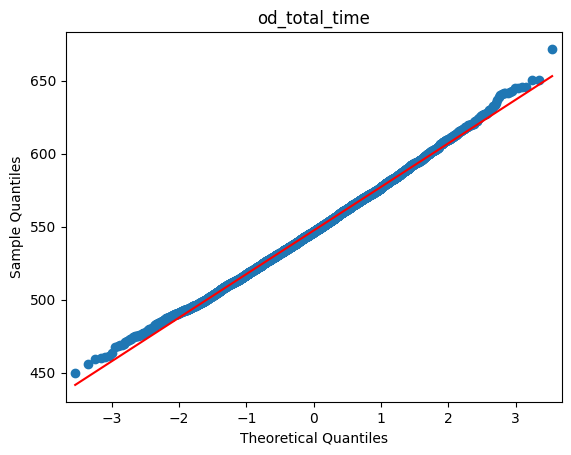

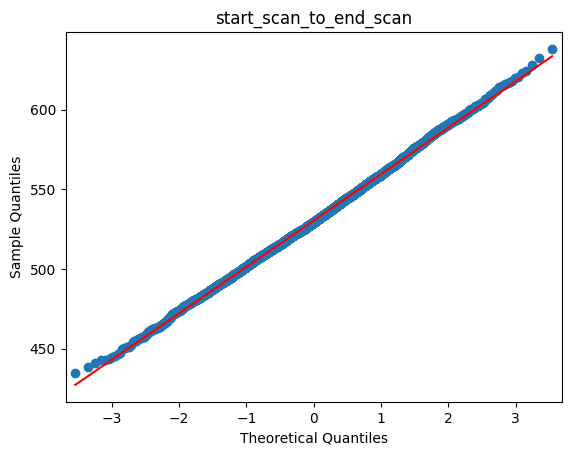

In [ ]:
for i in range(2):
   qqplot( np.array(subsetsamplemean[i]) , line="s")
   plt.title(subset[i])
   plt.show()

* From Shapiro, Histogram & QQ plot--> we can conclude that both data sets sample means are not following Normal Distribution, slightly deviated
* Now we will do Levene test to check for equal Variances of datasets

In [ ]:
# Ho: Variances are equal
# Ha: Variances are not equal
levene_stat, p_value = levene(data2[subset[0]],data2[subset[1]])
print(p_value)
if p_value < 0.05:
    print("Reject Ho")
    print("Variances are not equal")
else:
    print("Fail to reject Ho")
    print("Variances are equal")

0.04528721781238512
Reject Ho
Variances are not equal


* Both Datasets do not have equal Variance
* T-Test Independent is valid on the assumptions that 1. Sample means of 2 data sets follow Normal Distribution & Datasets Have Equal Variances
* But both of them are not valid
* so we will **Non-Paramteric Independent sample T-test**

In [ ]:
# subset = ["od_total_time","start_scan_to_end_scan"]

#H0: mu1 <= mu2
#Ha : mu1 > mu2

kruskal_stat, p_value= mannwhitneyu(data2[subset[0]],data2[subset[1]],alternative = "greater")
print(p_value)
if p_value < 0.05:
    print("Reject H0")
    print("One or more groups have different mean")
else:
    print("Fail to reject H0")
    print("All groups have same mean")

0.010834055922721585
Reject H0
One or more groups have different mean


* From Hypothesis Testing we can conclude that, **"od_total_time" is greater than "start_scan_to_end_scan" for a given trip_uuid**

## actual_time and osrm_time

In [ ]:
subset = ["actual_time","osrm_time"]

In [ ]:
subsetsamplemean = [[np.mean(data2[i].sample(500)) for k in range(5000)] for i in subset]

* let's check for Normal Distribution of both Data sets Sample Mean

In [ ]:
# H0 : Data is Gaussian
# Ha : Data is not Gaussian
for i in range(2):
  test_stat, p_value = shapiro(subsetsamplemean[i])
  print(p_value)
  if p_value < 0.05:
       print("Reject H0")
       print(subset[i],"Data is Not Gaussian")
  else:
       print("Fail to reject H0")
       print(subset[i],"Data is Gaussian")
  print()

1.142875362347695e-06
Reject H0
actual_time Data is Not Gaussian

3.08930866594892e-05
Reject H0
osrm_time Data is Not Gaussian



* Let us plot Histplot to check how data actually looks

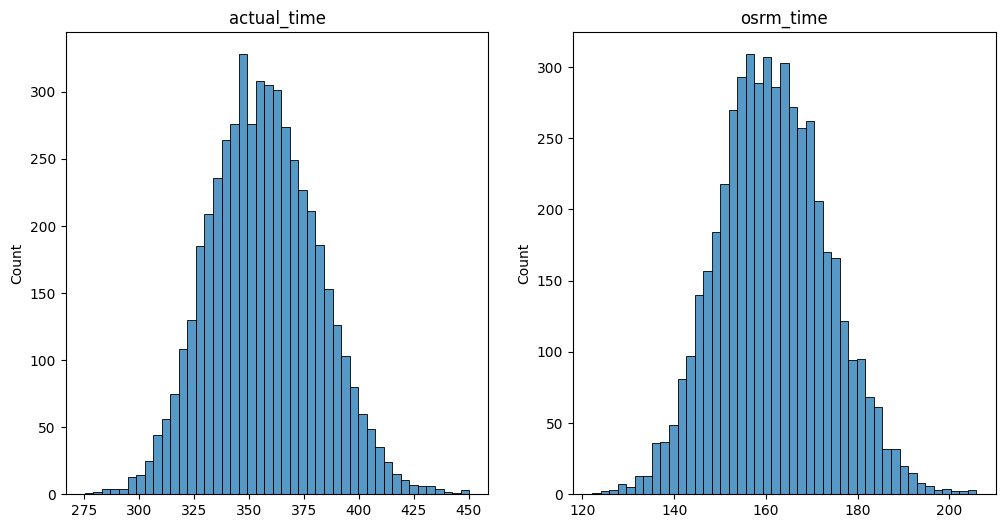

In [ ]:
plt.figure(figsize = (12,6))
for i in range(2):
  plt.subplot(1,2,i+1)
  sns.histplot(subsetsamplemean[i])
  plt.title(subset[i])
plt.show()

* Even the Histogram shows that they are not following Normal Distribution
* Let's do QQ Plot also

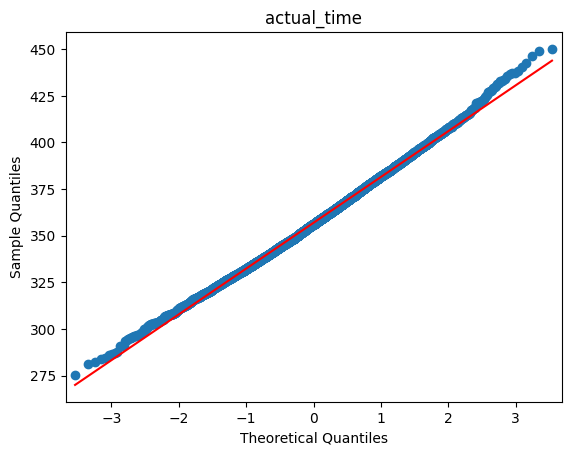

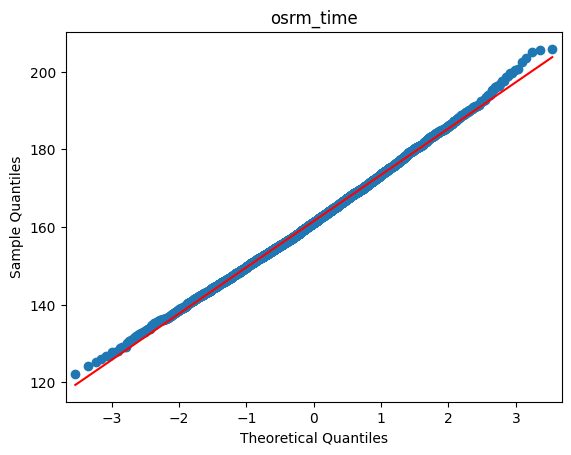

In [ ]:
for i in range(2):
   qqplot( np.array(subsetsamplemean[i]) , line="s")
   plt.title(subset[i])
   plt.show()

* From Shapiro, Histogram & QQ plot--> we can conclude that both data sets sample means are not following Normal Distribution, slightly deviated
* Now we will do Levene test to check for equal Variances of datasets

In [ ]:
# Ho: Variances are equal
# Ha: Variances are not equal
levene_stat, p_value = levene(data2[subset[0]],data2[subset[1]])
print(p_value)
if p_value < 0.05:
    print("Reject Ho")
    print("Variances are not equal")
else:
    print("Fail to reject Ho")
    print("Variances are equal")

1.871297993683208e-220
Reject Ho
Variances are not equal


* Both Datasets do not have equal Variance
* T-Test Independent is valid on the assumptions that 1. Sample means of 2 data sets follow Normal Distribution & Datasets Have Equal Variances
* But both of them are not valid
* so we will **Non-Paramteric Independent sample T-test**

In [ ]:
# subset = ["actual_time","osrm_time"]

#H0: mu1 <= mu2
#Ha : mu1 > mu2

kruskal_stat, p_value= mannwhitneyu(data2[subset[0]],data2[subset[1]],alternative = "greater")
print(p_value)
if p_value < 0.05:
    print("Reject H0")
    print("One or more groups have different mean")
else:
    print("Fail to reject H0")
    print("All groups have same mean")

0.0
Reject H0
One or more groups have different mean


* From Hypothesis Testing we can conclude that, **"actual_time" is always greater than "osrm_time" for a given trip_uuid**

## actual_time  and segment_actual_time

In [ ]:
subset = ["actual_time","segment_actual_time"]

In [ ]:
subsetsamplemean = [[np.mean(data2[i].sample(500)) for k in range(5000)] for i in subset]

* let's check for Normal Distribution of both Data set's Sample mean

In [ ]:
# H0 : Data is Gaussian
# Ha : Data is not Gaussian
for i in range(2):
  test_stat, p_value = shapiro(subsetsamplemean[i])
  print(p_value)
  if p_value < 0.05:
       print("Reject H0")
       print(subset[i],"Data is Not Gaussian")
  else:
       print("Fail to reject H0")
       print(subset[i],"Data is Gaussian")
  print()

4.538553000088541e-08
Reject H0
actual_time Data is Not Gaussian

0.0002473114291206002
Reject H0
segment_actual_time Data is Not Gaussian



* Let us plot Histplot to check how data actually looks

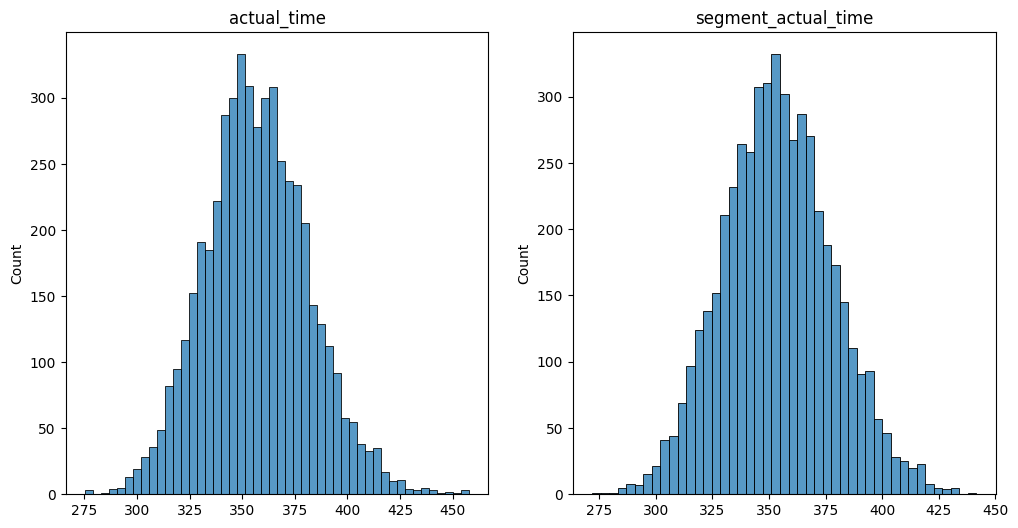

In [ ]:
plt.figure(figsize = (12,6))
for i in range(2):
  plt.subplot(1,2,i+1)
  sns.histplot(subsetsamplemean[i])
  plt.title(subset[i])
plt.show()

* Even the Histogram shows that they are not following Normal Distribution
* Let's do QQ Plot also

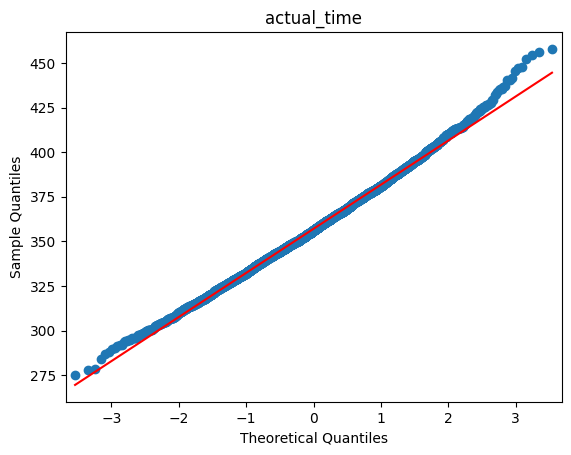

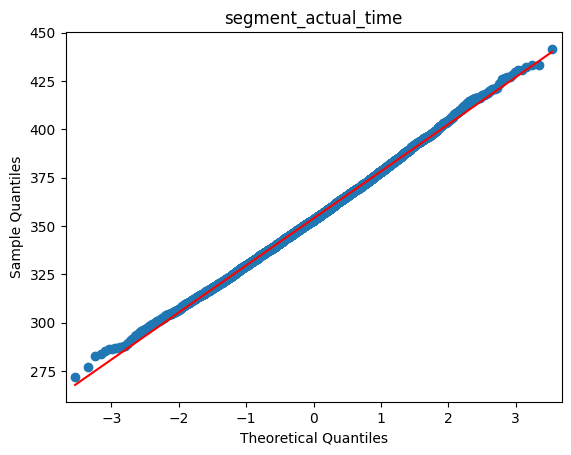

In [ ]:
for i in range(2):
   qqplot( np.array(subsetsamplemean[i]) , line="s")
   plt.title(subset[i])
   plt.show()

* From Shapiro, Histogram & QQ plot--> we can conclude that both data sets sample means are not following Normal Distribution, slightly deviated
* Now we will do Levene test to check for equal Variances of datasets

In [ ]:
# Ho: Variances are equal
# Ha: Variances are not equal
levene_stat, p_value = levene(data2[subset[0]],data2[subset[1]])
print(p_value)
if p_value < 0.05:
    print("Reject Ho")
    print("Variances are not equal")
else:
    print("Fail to reject Ho")
    print("Variances are equal")

0.6955022668700895
Fail to reject Ho
Variances are equal


* Both Datasets do not have equal Variance
* T-Test Independent is valid on the assumptions that 1. Sample means of 2 data sets follow Normal Distribution & Datasets Have Equal Variances
* But only Equal Variance Assumption is satisfying
* so we will **Non-Paramteric Independent sample T-test**

In [ ]:
# subset = ["actual_time","segment_actual_time"]

# H0: mu1 = mu2
#Ha: mu1 != mu2

kruskal_stat, p_value= mannwhitneyu(data2[subset[0]],data2[subset[1]])
print(p_value)
if p_value < 0.05:
    print("Reject H0")
    print("One or more groups have different mean")
else:
    print("Fail to reject H0")
    print("All groups have same mean")

0.4164235159622476
Fail to reject H0
All groups have same mean


* From Hypothesis Testing we can conclude that, **"actual_time" & "segment_actual_time" have approx same mean for a given trip_uuid **

## osrm_distance and segment_osrm_distance

In [ ]:
subset = ["osrm_distance","segment_osrm_distance"]

In [ ]:
subsetsamplemean = [[np.mean(data2[i].sample(500)) for k in range(5000)] for i in subset]

* let's check for Normal Distribution of both Data sets Mean

In [ ]:
# H0 : Data is Gaussian
# Ha : Data is not Gaussian
for i in range(2):
  test_stat, p_value = shapiro(subsetsamplemean[i])
  print(p_value)
  if p_value < 0.05:
       print("Reject H0")
       print(subset[i],"Data is Not Gaussian")
  else:
       print("Fail to reject H0")
       print(subset[i],"Data is Gaussian")
  print()

3.2689862564438954e-05
Reject H0
osrm_distance Data is Not Gaussian

0.530376672744751
Fail to reject H0
segment_osrm_distance Data is Gaussian



* Let us plot Histplot to check how data actually looks

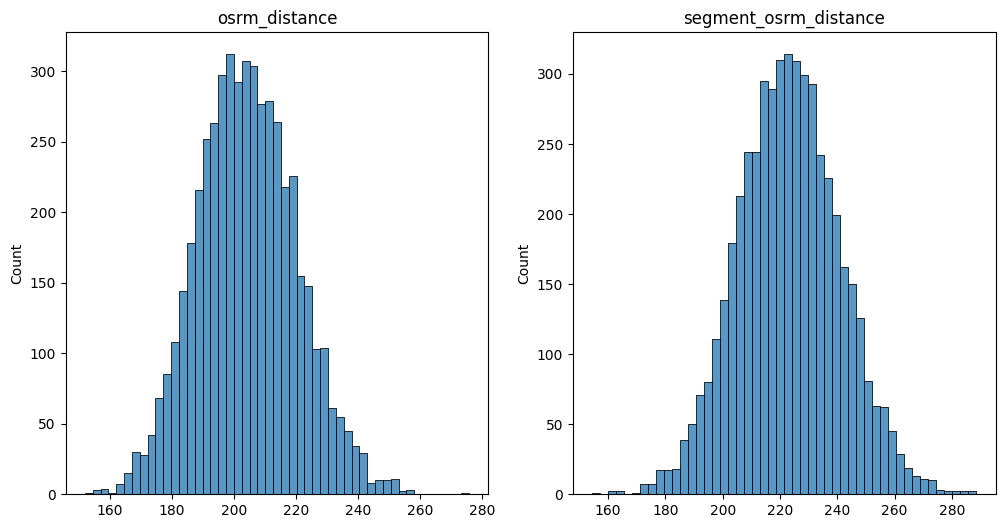

In [ ]:
plt.figure(figsize = (12,6))
for i in range(2):
  plt.subplot(1,2,i+1)
  sns.histplot(subsetsamplemean[i])
  plt.title(subset[i])
plt.show()

* Even the Histogram shows that they are not following Normal Distribution
* Let's do QQ Plot also

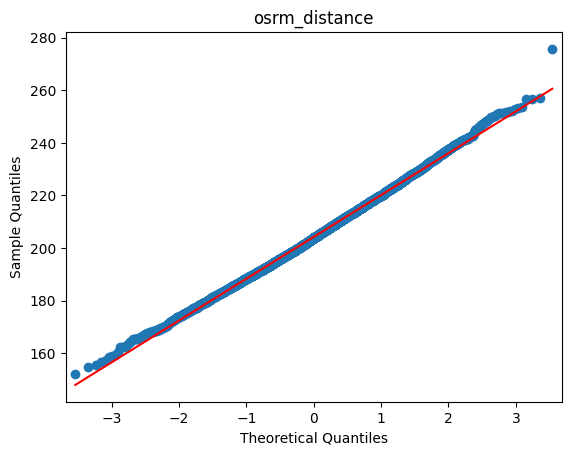

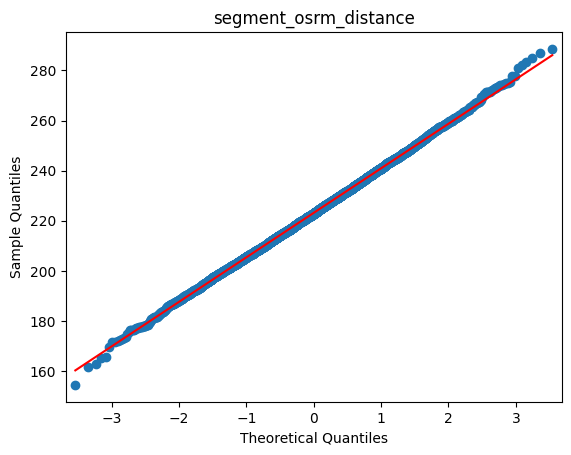

In [ ]:
for i in range(2):
   qqplot( np.array(subsetsamplemean[i]) , line="s")
   plt.title(subset[i])
   plt.show()

* From Shapiro, Histogram & QQ plot--> we can conclude that both data sets sample means are not following Normal Distribution, slightly deviated
* Now we will do Levene test to check for equal Variances of datasets

In [ ]:
# Ho: Variances are equal
# Ha: Variances are not equal
levene_stat, p_value = levene(data2[subset[0]],data2[subset[1]])
print(p_value)
if p_value < 0.05:
    print("Reject Ho")
    print("Variances are not equal")
else:
    print("Fail to reject Ho")
    print("Variances are equal")

0.00020976354422600578
Reject Ho
Variances are not equal


* Both Datasets do not have equal Variance
* T-Test Independent is valid on the assumptions that 1. Sample means of 2 data sets follow Normal Distribution & Datasets Have Equal Variances
* But both of them are not valid
* so we will **Non-Paramteric Independent sample T-test**

In [ ]:
# subset = ["osrm_distance","segment_osrm_distance"]

#H0: mu1 >= mu2
#Ha : mu1 < mu2

kruskal_stat, p_value= mannwhitneyu(data2[subset[0]],data2[subset[1]],alternative = "less")
print(p_value)
if p_value < 0.05:
    print("Reject H0")
    print("One or more groups have different mean")
else:
    print("Fail to reject H0")
    print("All groups have same mean")

4.755626029197483e-07
Reject H0
One or more groups have different mean


* From Hypothesis Testing we can conclude that, **"osrm_distance" is less than "segment_osrm_distance" for a given trip_uuid**

## osrm_time and segment_osrm_time

In [ ]:
subset = ["osrm_time","segment_osrm_time"]

In [ ]:
subsetsamplemean = [[np.mean(data2[i].sample(500)) for k in range(5000)] for i in subset]

* let's check for Normal Distribution of both Data sets

In [ ]:
# H0 : Data is Gaussian
# Ha : Data is not Gaussian
for i in range(2):
  test_stat, p_value = shapiro(subsetsamplemean[i])
  print(p_value)
  if p_value < 0.05:
       print("Reject H0")
       print(subset[i],"Data is Not Gaussian")
  else:
       print("Fail to reject H0")
       print(subset[i],"Data is Gaussian")
  print()

0.00081280228914693
Reject H0
osrm_time Data is Not Gaussian

1.6704287872926216e-06
Reject H0
segment_osrm_time Data is Not Gaussian



* Let us plot Histplot to check how data actually looks

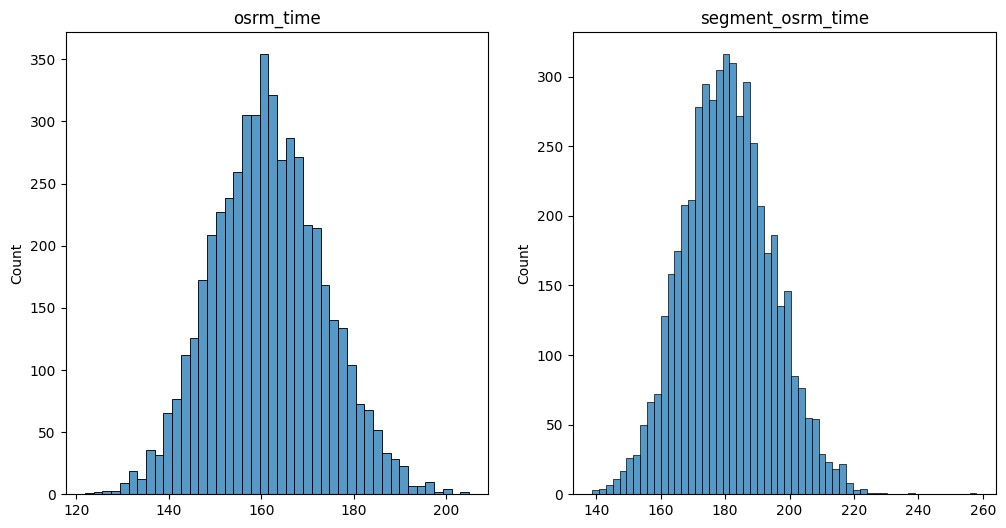

In [ ]:
plt.figure(figsize = (12,6))
for i in range(2):
  plt.subplot(1,2,i+1)
  sns.histplot(subsetsamplemean[i])
  plt.title(subset[i])
plt.show()

* Even the Histogram shows that they are not following Normal Distribution
* Let's do QQ Plot also

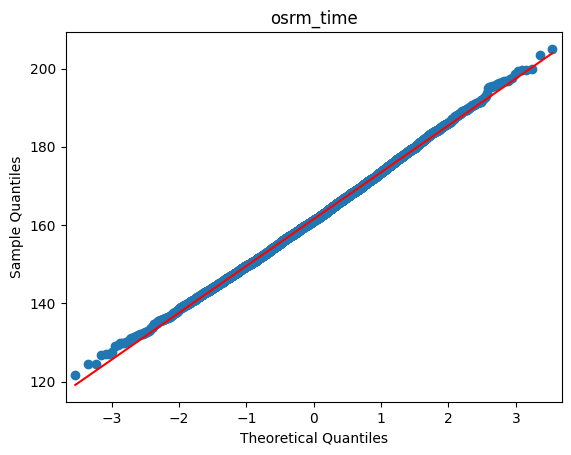

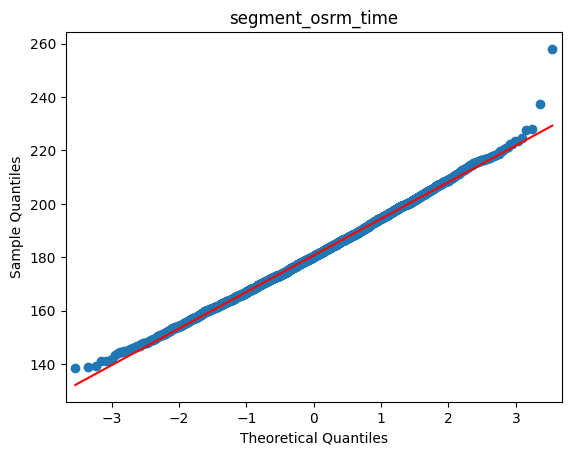

In [ ]:
for i in range(2):
   qqplot( np.array(subsetsamplemean[i]) , line="s")
   plt.title(subset[i])
   plt.show()

* From Shapiro, Histogram & QQ plot--> we can conclude that both data sets sample means are not following Normal Distribution, slightly deviated
* Now we will do Levene test to check for equal Variances of datasets

In [ ]:
# Ho: Variances are equal
# Ha: Variances are not equal
levene_stat, p_value = levene(data2[subset[0]],data2[subset[1]])
print(p_value)
if p_value < 0.05:
    print("Reject Ho")
    print("Variances are not equal")
else:
    print("Fail to reject Ho")
    print("Variances are equal")

8.349482669010088e-08
Reject Ho
Variances are not equal


* Both Datasets do not have equal Variance
* T-Test Independent is valid on the assumptions that 1. Sample means of 2 data sets follow Normal Distribution & Datasets Have Equal Variances
* But both of them are not valid
* so we will **Non-Paramteric Independent sample T-test**

In [ ]:
# subset = ["osrm_time","segment_osrm_time"]

#H0: mu1 >= mu2
#Ha : mu1 < mu2

kruskal_stat, p_value= mannwhitneyu(data2[subset[0]],data2[subset[1]],alternative = "less")
print(p_value)
if p_value < 0.05:
    print("Reject H0")
    print("One or more groups have different mean")
else:
    print("Fail to reject H0")
    print("All groups have same mean")

1.1497685429874432e-08
Reject H0
One or more groups have different mean


* From Hypothesis Testing we can conclude that, **"osrm_time" is less than "segment_osrm_time" for a given trip_uuid**

## actual_distance_to_destination and osrm_distance

In [ ]:
subset = ["actual_distance_to_destination","osrm_distance"]

In [ ]:
subsetsamplemean = [[np.mean(data2[i].sample(500)) for k in range(5000)] for i in subset]

* let's check for Normal Distribution of both Data sets

In [ ]:
# H0 : Data is Gaussian
# Ha : Data is not Gaussian
for i in range(2):
  test_stat, p_value = shapiro(subsetsamplemean[i])
  print(p_value)
  if p_value < 0.05:
       print("Reject H0")
       print(subset[i],"Data is Not Gaussian")
  else:
       print("Fail to reject H0")
       print(subset[i],"Data is Gaussian")
  print()

1.8086872159983614e-06
Reject H0
actual_distance_to_destination Data is Not Gaussian

2.4716477128094994e-05
Reject H0
osrm_distance Data is Not Gaussian



* Let us plot Histplot to check how data actually looks

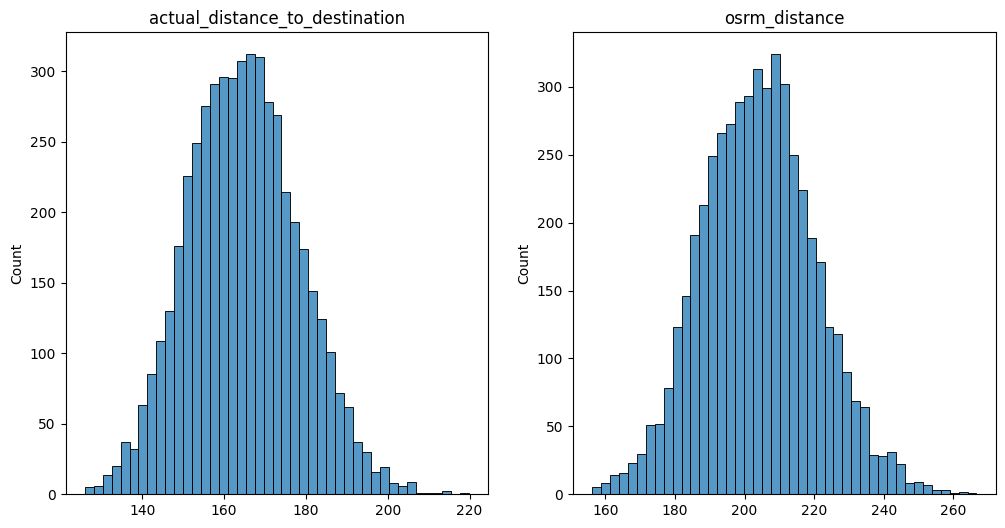

In [ ]:
plt.figure(figsize = (12,6))
for i in range(2):
  plt.subplot(1,2,i+1)
  sns.histplot(subsetsamplemean[i])
  plt.title(subset[i])
plt.show()

* Even the Histogram shows that they are not following Normal Distribution
* Let's do QQ Plot also

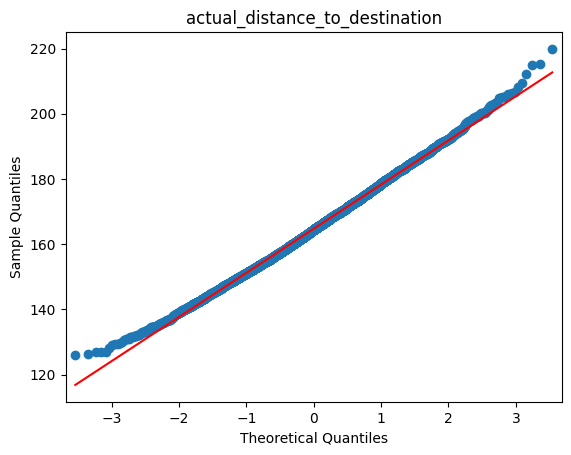

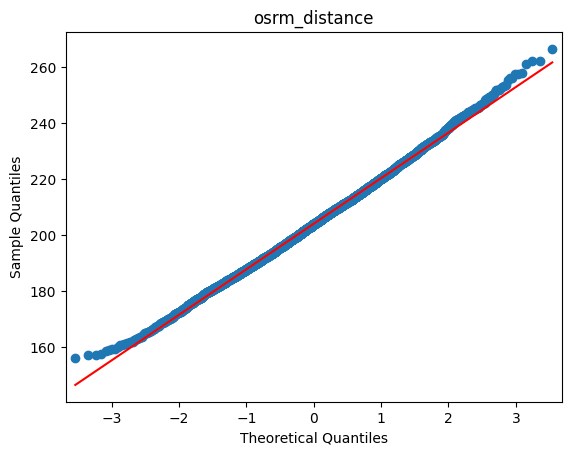

In [ ]:
for i in range(2):
   qqplot( np.array(subsetsamplemean[i]) , line="s")
   plt.title(subset[i])
   plt.show()

* From Shapiro, Histogram & QQ plot--> we can conclude that both data sets sample means are not following Normal Distribution, slightly deviated
* Now we will do Levene test to check for equal Variances of datasets

In [ ]:
# Ho: Variances are equal
# Ha: Variances are not equal
levene_stat, p_value = levene(data2[subset[0]],data2[subset[1]])
print(p_value)
if p_value < 0.05:
    print("Reject Ho")
    print("Variances are not equal")
else:
    print("Fail to reject Ho")
    print("Variances are equal")

1.5344941235406327e-17
Reject Ho
Variances are not equal


* Both Datasets do not have equal Variance
* T-Test Independent is valid on the assumptions that 1. Sample means of 2 data sets follow Normal Distribution & Datasets Have Equal Variances
* But both of them are not valid
* so we will **Non-Paramteric Independent sample T-test**

In [ ]:
# subset = ["actual_distance_to_destination","osrm_distance"]

#H0: mu1 >= mu2
#Ha : mu1 < mu2

kruskal_stat, p_value= mannwhitneyu(data2[subset[0]],data2[subset[1]],alternative = "less")
print(p_value)
if p_value < 0.05:
    print("Reject H0")
    print("One or more groups have different mean")
else:
    print("Fail to reject H0")
    print("All groups have same mean")

3.612957871564052e-76
Reject H0
One or more groups have different mean


* From Hypothesis Testing we can conclude that, **"actual_distance_to_destination" is less than "osrm_distance" for a given trip_uuid**

# **Feature Engineering**

### Eliminate Reduntant features

In [ ]:
data2.shape

(14817, 29)

In [ ]:
data2.drop(columns = ["trip_creation_time","source_name","destination_name"], axis = 1,inplace= True)

In [ ]:
data2.shape

(14817, 26)

## Encoding : Non-Numerical to Numerical

* We have to Convert all Non Numerical to Numerical Before feeding to Model
* we will use following to to convert all the Categorical data to Numerical
** "One-Hot Encoding" for Non Numerical features with 2 values [in Problem statemtent "One-Hot Encoding" explicity Requested, else we can be "label Encoder" also]
** "Target Encoder" for Non Numerical features with more than 2 values with **"actual_time"** as Target"

### Label Encoding

* Creating a Label Encoder Object

#### data

In [ ]:
le=LabelEncoder()

In [ ]:
data2["data"]=le.fit_transform(data2["data"])
data2["data"].value_counts()

1    10654
0     4163
Name: data, dtype: int64

1 --> Training Data
0 --> Test Data

### One-Hot Encoding

#### route_type

* As Explicity asked in the Problem statement, we are converting "route_type" Categorical to Numerical with One Hot Encoding

In [ ]:
data2["route_type"].value_counts()

Carting    8908
FTL        5909
Name: route_type, dtype: int64

In [ ]:
data2 = pd.get_dummies(data2, columns = ["route_type"])

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14817 entries, 0 to 14816
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   trip_uuid                       14817 non-null  object  
 1   data                            14817 non-null  int64   
 2   route_schedule_uuid             14817 non-null  object  
 3   source_center                   14817 non-null  object  
 4   destination_center              14817 non-null  object  
 5   start_scan_to_end_scan          14817 non-null  float64 
 6   actual_distance_to_destination  14817 non-null  float64 
 7   actual_time                     14817 non-null  float64 
 8   osrm_time                       14817 non-null  float64 
 9   osrm_distance                   14817 non-null  float64 
 10  segment_actual_time             14817 non-null  float64 
 11  segment_osrm_time               14817 non-null  float64 
 12  segment_osrm_dista

* we can see "route_type" category columns has been One Hot Encoded --> it converted into 2 Numerical columns : route_type_Carting & route_type_FTL
* Now we will converts other Non-Numricl columns with >2 group using Target Encoder

### Target Encoding

* As we are working to Build Forecast Models for "Actual_time", we will use it as Target for converting Categorical to Numerical using TargetEncoder

* Creating as TargetEncoder Object

In [ ]:
te=TargetEncoder()

#### source_center

In [ ]:
data2["source_center"].value_counts()

IND000000ACB    948
IND421302AAG    811
IND562132AAA    731
IND560099AAB    426
IND160002AAC    370
               ... 
IND504215AAA      1
IND844101AAB      1
IND284403AAA      1
IND621212AAA      1
IND303338AAB      1
Name: source_center, Length: 868, dtype: int64

In [ ]:
data2["source_center"]=te.fit_transform(data2["source_center"],data2["actual_time"])
data2["source_center"].value_counts()

754.231013    948
469.427867    811
553.675787    731
99.046948     426
638.697297    370
             ... 
339.820623      1
351.660494      1
364.931559      1
324.858149      1
344.894854      1
Name: source_center, Length: 789, dtype: int64

#### others

In [ ]:
data2.columns

Index(['trip_uuid', 'data', 'route_schedule_uuid', 'source_center',
       'destination_center', 'start_scan_to_end_scan',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance', 'od_total_time', 'trip_creation_hour',
       'trip_creation_day', 'trip_creation_week', 'trip_creation_month',
       'trip_creation_year', 'source_state', 'source_city', 'source_place',
       'destination_state', 'destination_city', 'destination_place',
       'route_type_Carting', 'route_type_FTL'],
      dtype='object')

In [ ]:
nonnumerical = ['destination_center','trip_uuid','route_schedule_uuid','trip_creation_hour',
       'trip_creation_day', 'trip_creation_week', 'trip_creation_month',
       'trip_creation_year', 'source_state', 'source_city', 'source_place',
       'destination_state', 'destination_city', 'destination_place']

In [ ]:
for i in nonnumerical:
  data2[i]=te.fit_transform(data2[i],data2["actual_time"])

In [ ]:
for i in data2.columns:
  print(i,"-->",data2[i].dtype,"-->",data2[i].nunique())

trip_uuid --> float64 --> 1853
data --> int64 --> 2
route_schedule_uuid --> float64 --> 1443
source_center --> float64 --> 789
destination_center --> float64 --> 840
start_scan_to_end_scan --> float64 --> 2208
actual_distance_to_destination --> float64 --> 14801
actual_time --> float64 --> 1853
osrm_time --> float64 --> 817
osrm_distance --> float64 --> 14734
segment_actual_time --> float64 --> 1890
segment_osrm_time --> float64 --> 1242
segment_osrm_distance --> float64 --> 14754
od_total_time --> float64 --> 14817
trip_creation_hour --> float64 --> 24
trip_creation_day --> float64 --> 22
trip_creation_week --> float64 --> 4
trip_creation_month --> float64 --> 2
trip_creation_year --> float64 --> 1
source_state --> float64 --> 33
source_city --> float64 --> 613
source_place --> float64 --> 659
destination_state --> float64 --> 41
destination_city --> float64 --> 684
destination_place --> float64 --> 714
route_type_Carting --> uint8 --> 2
route_type_FTL --> uint8 --> 2


* All Feature have been converted to Numerical data type

## Scaling of Numerical Categories

* Before Scaling we will store the Row index for test and Tain data, so that we can separate data after Scaling

In [ ]:
data2.shape

(14817, 27)

In [ ]:
testtrain = data2["data"]
data2.drop(columns = ["data"],axis=1,inplace=True)

In [ ]:
data2.shape

(14817, 26)

* From PCA Mathematical Derivation, we know that if Any Feature's Mean is "0", it will be easy to do Computation
* Also If Feature's Mean = 0, then Model Development will be good
* So we will do Standardization instead of Normalization

### Standardization

In [ ]:
scaler = StandardScaler()

In [ ]:
standardized = scaler.fit_transform(data2)

In [ ]:
standardized

array([[ 2.14625072,  0.75265239,  0.92618362, ...,  1.46387707,
        -1.22781549,  1.22781549],
       [-0.38146143, -0.24588095, -0.29061509, ..., -0.20542008,
         0.81445462, -0.81445462],
       [ 5.32593091,  5.1735464 ,  0.79201088, ...,  0.78807576,
        -1.22781549,  1.22781549],
       ...,
       [-0.13385608, -0.39274303, -0.03958484, ...,  0.7209205 ,
         0.81445462, -0.81445462],
       [-0.16592008, -0.18628031, -0.45690199, ..., -0.42665845,
         0.81445462, -0.81445462],
       [-0.14632542, -0.13928955, -0.43218183, ..., -0.3540543 ,
        -1.22781549,  1.22781549]])

lets convert standardized data into our initial DataFrame Format

In [ ]:
datafinal = pd.DataFrame(standardized,columns = data2.columns)

In [ ]:
datafinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14817 entries, 0 to 14816
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   trip_uuid                       14817 non-null  float64
 1   route_schedule_uuid             14817 non-null  float64
 2   source_center                   14817 non-null  float64
 3   destination_center              14817 non-null  float64
 4   start_scan_to_end_scan          14817 non-null  float64
 5   actual_distance_to_destination  14817 non-null  float64
 6   actual_time                     14817 non-null  float64
 7   osrm_time                       14817 non-null  float64
 8   osrm_distance                   14817 non-null  float64
 9   segment_actual_time             14817 non-null  float64
 10  segment_osrm_time               14817 non-null  float64
 11  segment_osrm_distance           14817 non-null  float64
 12  od_total_time                   

### Standardized Data

In [ ]:
datafinal.shape

(14817, 26)

In [ ]:
datafinal.head()

,trip_uuid,route_schedule_uuid,source_center,destination_center,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,...,trip_creation_month,trip_creation_year,source_state,source_city,source_place,destination_state,destination_city,destination_place,route_type_Carting,route_type_FTL
0,2.146251,0.752652,0.926184,1.395621,2.623702,2.162092,2.146251,2.047585,2.124848,2.146791,...,0.370449,0.0,1.084445,0.487163,1.038697,1.099760,1.509164,1.463877,-1.227815,1.227815
1,-0.381461,-0.245881,-0.290615,-0.206382,-0.532593,-0.298944,-0.381461,-0.344144,-0.321920,-0.382742,...,0.370449,0.0,-0.661491,-0.254223,-0.315120,-0.635412,-0.187413,-0.205420,0.814455,-0.814455
2,5.325931,5.173546,0.792011,0.747063,5.165134,5.772935,5.325931,5.817598,5.804050,5.310954,...,0.370449,0.0,-0.661491,0.933378,0.889415,0.766495,0.781831,0.788076,-1.227815,1.227815
3,-0.531093,-0.562513,-1.408815,-1.132277,-0.654047,-0.482362,-0.531093,-0.539462,-0.498578,-0.530163,...,0.370449,0.0,-0.645420,-1.490880,0.054030,-0.917633,-1.364243,-1.170208,0.814455,-0.814455
4,-0.028757,-0.085846,-0.316435,-0.119761,0.282670,-0.121257,-0.028757,-0.163566,-0.155387,-0.024976,...,0.370449,0.0,-0.661491,-0.283372,-0.755174,-0.635412,-0.084897,-0.354054,-1.227815,1.227815


In [ ]:
datafinal.describe()

,trip_uuid,route_schedule_uuid,source_center,destination_center,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,...,trip_creation_month,trip_creation_year,source_state,source_city,source_place,destination_state,destination_city,destination_place,route_type_Carting,route_type_FTL
count,1.481700e+04,1.481700e+04,1.481700e+04,14817.000000,1.481700e+04,1.481700e+04,1.481700e+04,1.481700e+04,1.481700e+04,1.481700e+04,...,1.481700e+04,14817.0,1.481700e+04,1.481700e+04,1.481700e+04,1.481700e+04,1.481700e+04,1.481700e+04,1.481700e+04,1.481700e+04
mean,1.191671e-15,1.352319e-16,3.452728e-17,0.000000,3.260910e-17,-2.373751e-17,3.548638e-17,4.603638e-17,3.260910e-17,4.411820e-17,...,-1.657310e-15,0.0,4.757092e-16,-1.266000e-16,1.457819e-16,1.150909e-17,-2.512819e-16,7.672730e-18,4.028183e-17,1.246819e-17
std,1.000034e+00,1.000034e+00,1.000034e+00,1.000034,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,...,1.000034e+00,0.0,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00
min,-6.201601e-01,-1.373608e+00,-1.605809e+00,-1.361388,-7.709467e-01,-5.091246e-01,-6.201601e-01,-5.726293e-01,-5.272157e-01,-6.200543e-01,...,-2.699428e+00,0.0,-2.173775e+00,-1.601270e+00,-1.778412e+00,-2.021607e+00,-1.407676e+00,-1.408943e+00,-1.227815e+00,-8.144546e-01
25%,-5.168428e-01,-4.508752e-01,-7.163032e-01,-0.843837,-5.796561e-01,-4.638208e-01,-5.168428e-01,-4.878685e-01,-4.685028e-01,-5.175785e-01,...,3.704488e-01,0.0,-6.614908e-01,-6.005740e-01,-7.194090e-01,-9.176329e-01,-8.226134e-01,-7.943877e-01,-1.227815e+00,-8.144546e-01
50%,-3.707734e-01,-2.348909e-01,-1.360075e-01,-0.186589,-3.807746e-01,-3.798696e-01,-3.707734e-01,-3.736257e-01,-3.745471e-01,-3.719551e-01,...,3.704488e-01,0.0,-3.639566e-01,-2.638064e-02,-3.791219e-02,-1.850890e-01,-8.467698e-02,-1.406023e-01,8.144546e-01,-8.144546e-01
75%,2.290126e-02,4.260768e-02,5.919698e-01,0.562946,1.612154e-01,3.450474e-04,2.290126e-02,2.438156e-02,1.115146e-02,2.356531e-02,...,3.704488e-01,0.0,9.810524e-01,5.366739e-01,4.989239e-01,9.333450e-01,6.226045e-01,5.962239e-01,8.144546e-01,1.227815e+00
max,1.052386e+01,7.588890e+00,4.223425e+00,3.512398,1.118472e+01,6.621482e+00,1.052386e+01,6.893692e+00,7.116244e+00,1.056418e+01,...,3.704488e-01,0.0,4.100426e+00,2.957775e+00,3.217637e+00,2.940055e+00,2.858012e+00,3.669570e+00,8.144546e-01,1.227815e+00


<Axes: >

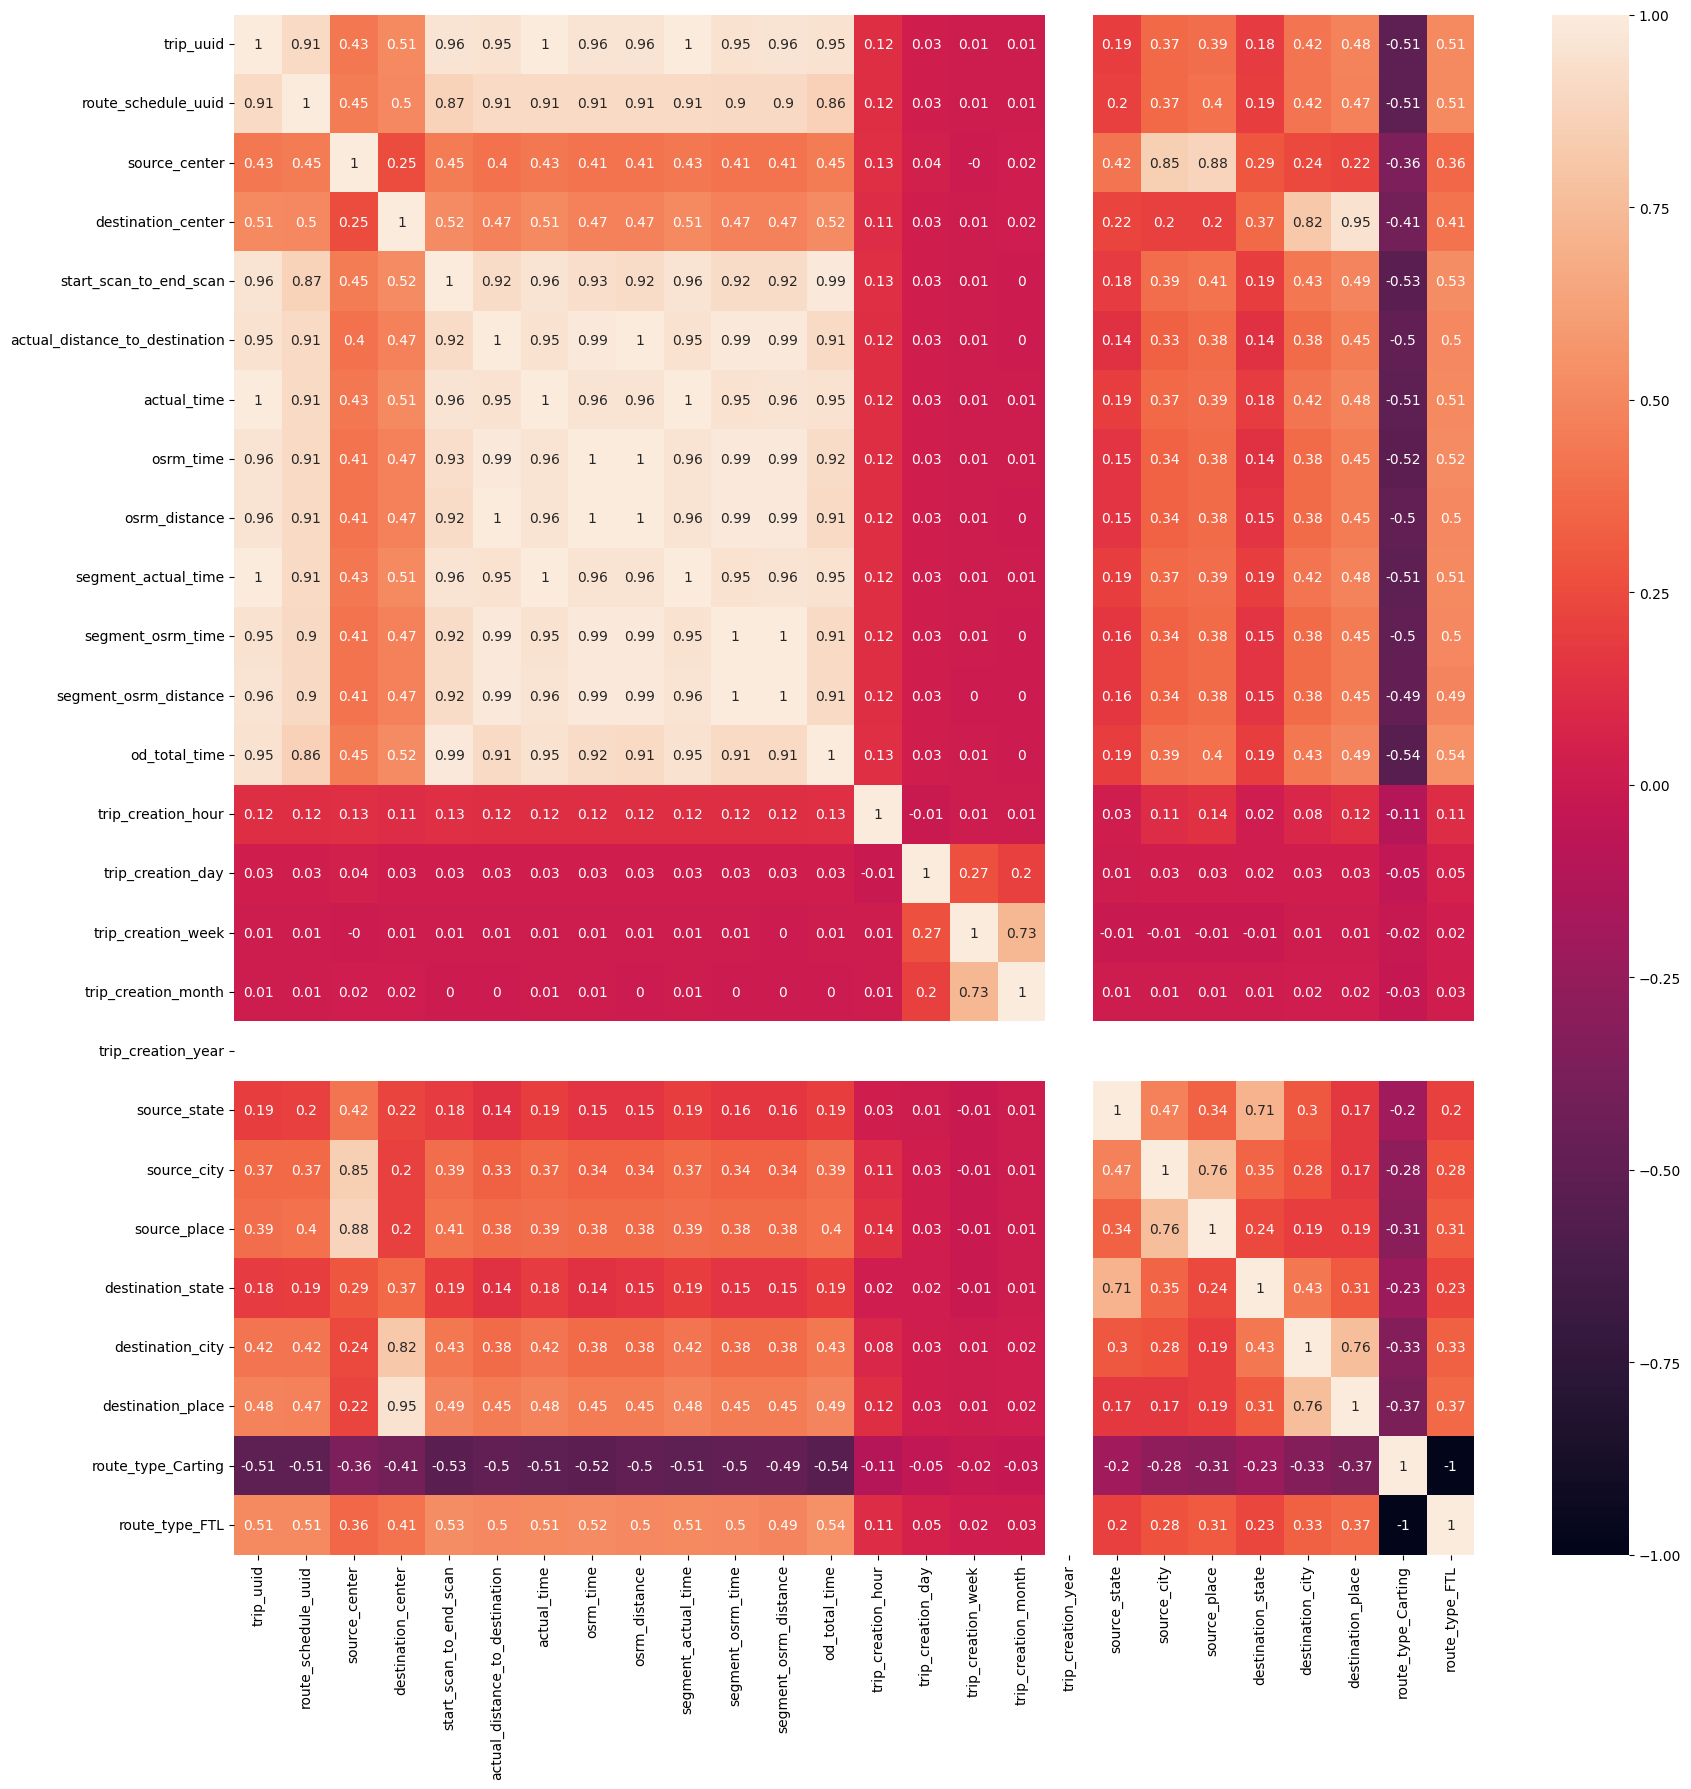

In [ ]:
plt.figure(figsize = (20,20))
sns.heatmap(round(datafinal.corr(),2),annot=True)

* Actual_time for Delivery is very well dependent on Source & Destination - City & Place
* Actual_time for delivery is comparatively less dependent on Source & Destination State & Time of Booking[hour,day,week,month]

### Normalization

In [ ]:
# H0 : Data is Gaussian
# Ha : Data is not Gaussian
for i in data2.columns:
  test_stat, p_value = shapiro(data2[i].sample(5000))
  print(p_value)
  if p_value < 0.05:
       print("Reject H0")
       print(i,"Data is Not Gaussian")
  else:
       print("Fail to reject H0")
       print(i,"Data is Gaussian")

0.0
Reject H0
trip_uuid Data is Not Gaussian
0.0
Reject H0
route_schedule_uuid Data is Not Gaussian
1.0856286599155977e-38
Reject H0
source_center Data is Not Gaussian
0.0
Reject H0
destination_center Data is Not Gaussian
0.0
Reject H0
start_scan_to_end_scan Data is Not Gaussian
0.0
Reject H0
actual_distance_to_destination Data is Not Gaussian
0.0
Reject H0
actual_time Data is Not Gaussian
0.0
Reject H0
osrm_time Data is Not Gaussian
0.0
Reject H0
osrm_distance Data is Not Gaussian
0.0
Reject H0
segment_actual_time Data is Not Gaussian
0.0
Reject H0
segment_osrm_time Data is Not Gaussian
0.0
Reject H0
segment_osrm_distance Data is Not Gaussian
0.0
Reject H0
od_total_time Data is Not Gaussian
1.6944337293091785e-31
Reject H0
trip_creation_hour Data is Not Gaussian
0.0
Reject H0
trip_creation_day Data is Not Gaussian
0.0
Reject H0
trip_creation_week Data is Not Gaussian
0.0
Reject H0
trip_creation_month Data is Not Gaussian
1.0
Fail to reject H0
trip_creation_year Data is Gaussian
0.0
Re

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


*
* In Practice, we have observed that All the Numericals are not following Normal Distribution, so we cannot do Stardadization
* For the sake of better convergence, we are using Standardization above
* Now we will do Normalization also but only for practice, we will not use it further

In [ ]:
Normscaler = MinMaxScaler()

In [ ]:
normalised = Normscaler.fit_transform(data2)

In [ ]:
normalised

array([[0.24824169, 0.23723967, 0.43436107, ..., 0.56568126, 0.        ,
        1.        ],
       [0.02141944, 0.12582728, 0.22562033, ..., 0.23698325, 1.        ,
        0.        ],
       [0.53356777, 0.7305055 , 0.41134386, ..., 0.43261056, 0.        ,
        1.        ],
       ...,
       [0.04363811, 0.10944099, 0.26868435, ..., 0.41938715, 1.        ,
        0.        ],
       [0.04076087, 0.13247729, 0.19709396, ..., 0.19341964, 1.        ,
        0.        ],
       [0.04251918, 0.13772033, 0.20133468, ..., 0.20771598, 0.        ,
        1.        ]])

In [ ]:
datafinal2 = pd.DataFrame(normalised,columns = data2.columns)

In [ ]:
datafinal2.describe()

,trip_uuid,route_schedule_uuid,source_center,destination_center,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,...,trip_creation_month,trip_creation_year,source_state,source_city,source_place,destination_state,destination_city,destination_place,route_type_Carting,route_type_FTL
count,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,...,14817.000000,14817.0,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000,14817.000000
mean,0.055650,0.153262,0.275475,0.279329,0.064484,0.071400,0.055650,0.076695,0.068976,0.055440,...,0.879328,0.0,0.346462,0.351229,0.355964,0.407446,0.330000,0.277432,0.601201,0.398799
std,0.089737,0.111580,0.171555,0.205186,0.083645,0.140245,0.089737,0.133939,0.130835,0.089415,...,0.325757,0.0,0.159388,0.219352,0.200165,0.201552,0.234437,0.196915,0.489668,0.489668
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.009271,0.102955,0.152594,0.106191,0.016000,0.006353,0.009271,0.011352,0.007681,0.009163,...,1.000000,0.0,0.241032,0.219497,0.211968,0.222501,0.137155,0.121011,0.000000,0.000000
50%,0.022379,0.127054,0.252143,0.241044,0.032635,0.018127,0.022379,0.026654,0.019974,0.022183,...,1.000000,0.0,0.288454,0.345443,0.348375,0.370142,0.310149,0.249746,1.000000,0.000000
75%,0.057705,0.158016,0.377027,0.394833,0.077968,0.071448,0.057705,0.079961,0.070435,0.057547,...,1.000000,0.0,0.502825,0.468946,0.455827,0.595557,0.475956,0.394833,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Final data - Dividing Data for Training & Test

* we will use "testtrain" & divide data into X --> our Features
Y --> Desired Outcome [ Our desired outcome is "actual_time"]
* we will have 4 below datasets
** Xtrain
** Xtest
** ytrain
** ytest

In [ ]:
y = data2["actual_time"]
X = datafinal.drop(columns = ["actual_time"],axis=1)

In [ ]:
X.shape, y.shape

((14817, 25), (14817,))

In [ ]:
Xtrain = X.loc[testtrain == 1]
Xtest = X.loc[testtrain == 0]
ytrain = y.loc[testtrain == 1]
ytest = y.loc[testtrain == 0]

In [ ]:
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((10654, 25), (4163, 25), (10654,), (4163,))

# **Bussiness Insights**

* The DataSet provided is between 2018-09-12 00:00:16.535741 & 2018-10-03 23:59:42.701692
* Training : Test Data Ratio use = 72:28
* 60% trips are of Cart Types, rest are of FTL type
* Trip creations are lowest in the Noon and Starts to increase and reaches peak in midnight
* More Number of Trip are created in the moiddle of the month and Number of trips are less at start and End of month
* There is not much effect of Week ina month for trip Creation
* Top 5 Source States:Maharastra,Karnataka,Harayana,Tamilnadu,Delhi
* Top 5 destination States: Maharastra,Karnataka,Harayana,Tamilnadu,Telangana
* Top5 Source Cities:Bengaluru,Gurgoan,Mumbai,Bhiwandi,Delhi
* Top5 Destination Cities: Bengaluru,Mumbai,Gurgoan,Hyderabad,Bhiwandi

* "od_total_time" is greater than "start_scan_to_end_scan" for a given trip_uuid
* "actual_time" is always greater than "osrm_time" for a given trip_uuid
* "actual_time" & "segment_actual_time" have approx same mean for a given trip_uuid
* "osrm_distance" is less than "segment_osrm_distance" for a given trip_uuid
* "osrm_time" is less than "segment_osrm_time" for a given trip_uuid
* "actual_distance_to_destination" is less than "osrm_distance" for a given trip_uuid

# **Recommendations**

* Major Traffic is found in Maharastra, Karnataka,Haryana --> Appropriate infrastructure & Manpower needs to be maintained to reduce logitics Delays
* Carting Type Trip from among manjor Cities (Bengaluru, Gurugaon,Mumbai,Hyderabad,Delhi,Bhiwandi) can be Converted to FTL by delhivery to further Optimize the Total trip Duration
* High Trip Creation goes on during night time, & in the middle of the month, so appropriate Resource to be maintained to reduce process bottle Necks
* Actual Trip Time is alwasy greater than Osrm predicted time, so Accordingly Buffer to be added , so that no false commitment at customer end
* Actual Distance_to_Destination is statistically lower than osrm distance, so correction might be needed for distance calculation so that price of trip can be optimised according & best value can be given to customer